# Базовый SQL

## Цель исследования
Проанализировать данные о фондах и инвестициях и написать запросы к базе.


## Описание данных
База данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle. 


Таблицы:

*acquisition*

Содержит информацию о покупках одних компаний другими.
Таблица включает такие поля:
- первичный ключ id — идентификатор или уникальный номер покупки;
- внешний ключ acquiring_company_id — ссылается на таблицу company — идентификатор компании-покупателя, то есть той, что покупает другую компанию;
- внешний ключ acquired_company_id — ссылается на таблицу company — идентификатор компании, которую покупают;
- term_code — способ оплаты сделки:
- cash — наличными;
- stock — акциями компании;
- cash_and_stock — смешанный тип оплаты: наличные и акции.
- price_amount — сумма покупки в долларах;
- acquired_at — дата совершения сделки;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.


*company*

Содержит информацию о компаниях-стартапах.
- первичный ключ id — идентификатор, или уникальный номер компании;
- name — название компании;
- category_code — категория деятельности компании, например:
- news — специализируется на работе с новостями;
- social — специализируется на социальной работе.
- status — статус компании:
- acquired — приобретена;
- operating — действует;
- ipo — вышла на IPO;
- closed — перестала существовать.
- founded_at — дата основания компании;
- closed_at — дата закрытия компании, которую указывают в том случае, если компании больше не существует;
- domain — домен сайта компании;
- twitter_username — название профиля компании в твиттере;
- country_code — код страны, например, USA для США, GBR для Великобритании;
- investment_rounds — число раундов, в которых компания участвовала как инвестор;
- funding_rounds — число раундов, в которых компания привлекала инвестиции;
- funding_total — сумма привлечённых инвестиций в долларах;
- milestones — количество важных этапов в истории компании;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.


*education*

Хранит информацию об уровне образования сотрудников компаний.
- первичный ключ id — уникальный номер записи с информацией об образовании;
- внешний ключ person_id — ссылается на таблицу people — идентификатор человека, информация о котором представлена в записи;
- degree_type — учебная степень, например:
- BA — Bachelor of Arts — бакалавр гуманитарных наук;
- MS — Master of Science — магистр естественных наук.
- instituition — учебное заведение, название университета;
- graduated_at — дата завершения обучения, выпуска;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.


*fund*

Хранит информацию о венчурных фондах. 
- первичный ключ id — уникальный номер венчурного фонда;
- name — название венчурного фонда;
- founded_at — дата основания фонда;
- domain — домен сайта фонда;
- twitter_username — профиль фонда в твиттере;
- country_code — код страны фонда;
- investment_rounds — число инвестиционных раундов, в которых фонд принимал участие;
- invested_companies — число компаний, в которые инвестировал фонд;
- milestones — количество важных этапов в истории фонда;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.


*funding_round*

Содержит информацию о раундах инвестиций. 
- первичный ключ id — уникальный номер инвестиционного раунда;
- внешний ключ company_id — ссылается на таблицу company — уникальный номер компании, участвовавшей в инвестиционном раунде;
- funded_at — дата проведения раунда;
- funding_round_type — тип инвестиционного раунда, например:
- venture — венчурный раунд;
- angel — ангельский раунд;
- series_a — раунд А.
- raised_amount — сумма инвестиций, которую привлекла компания в этом раунде в долларах;
- pre_money_valuation — предварительная, проведённая до инвестиций оценка стоимости компании в долларах;
- participants — количество участников инвестиционного раунда;
- is_first_round — является ли этот раунд первым для компании;
- is_last_round — является ли этот раунд последним для компании;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.


*investment*

Содержит информацию об инвестициях венчурных фондов в компании-стартапы.
- первичный ключ id — уникальный номер инвестиции;
- внешний ключ funding_round_id — ссылается на таблицу funding_round — уникальный номер раунда инвестиции;
- внешний ключ company_id — ссылается на таблицу company — уникальный номер компании-стартапа, в которую инвестируют;
- внешний ключ fund_id — ссылается на таблицу fund — уникальный номер фонда, инвестирующего в компанию-стартап;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.


*people*

Содержит информацию о сотрудниках компаний-стартапов.
- первичный ключ id — уникальный номер сотрудника;
- first_name — имя сотрудника;
- last_name — фамилия сотрудника;
- внешний ключ company_id — ссылается на таблицу company — уникальный номер компании-стартапа;
- twitter_username — профиль сотрудника в твиттере;
- created_at — дата и время создания записи в таблице;
- updated_at — дата и время обновления записи в таблице.

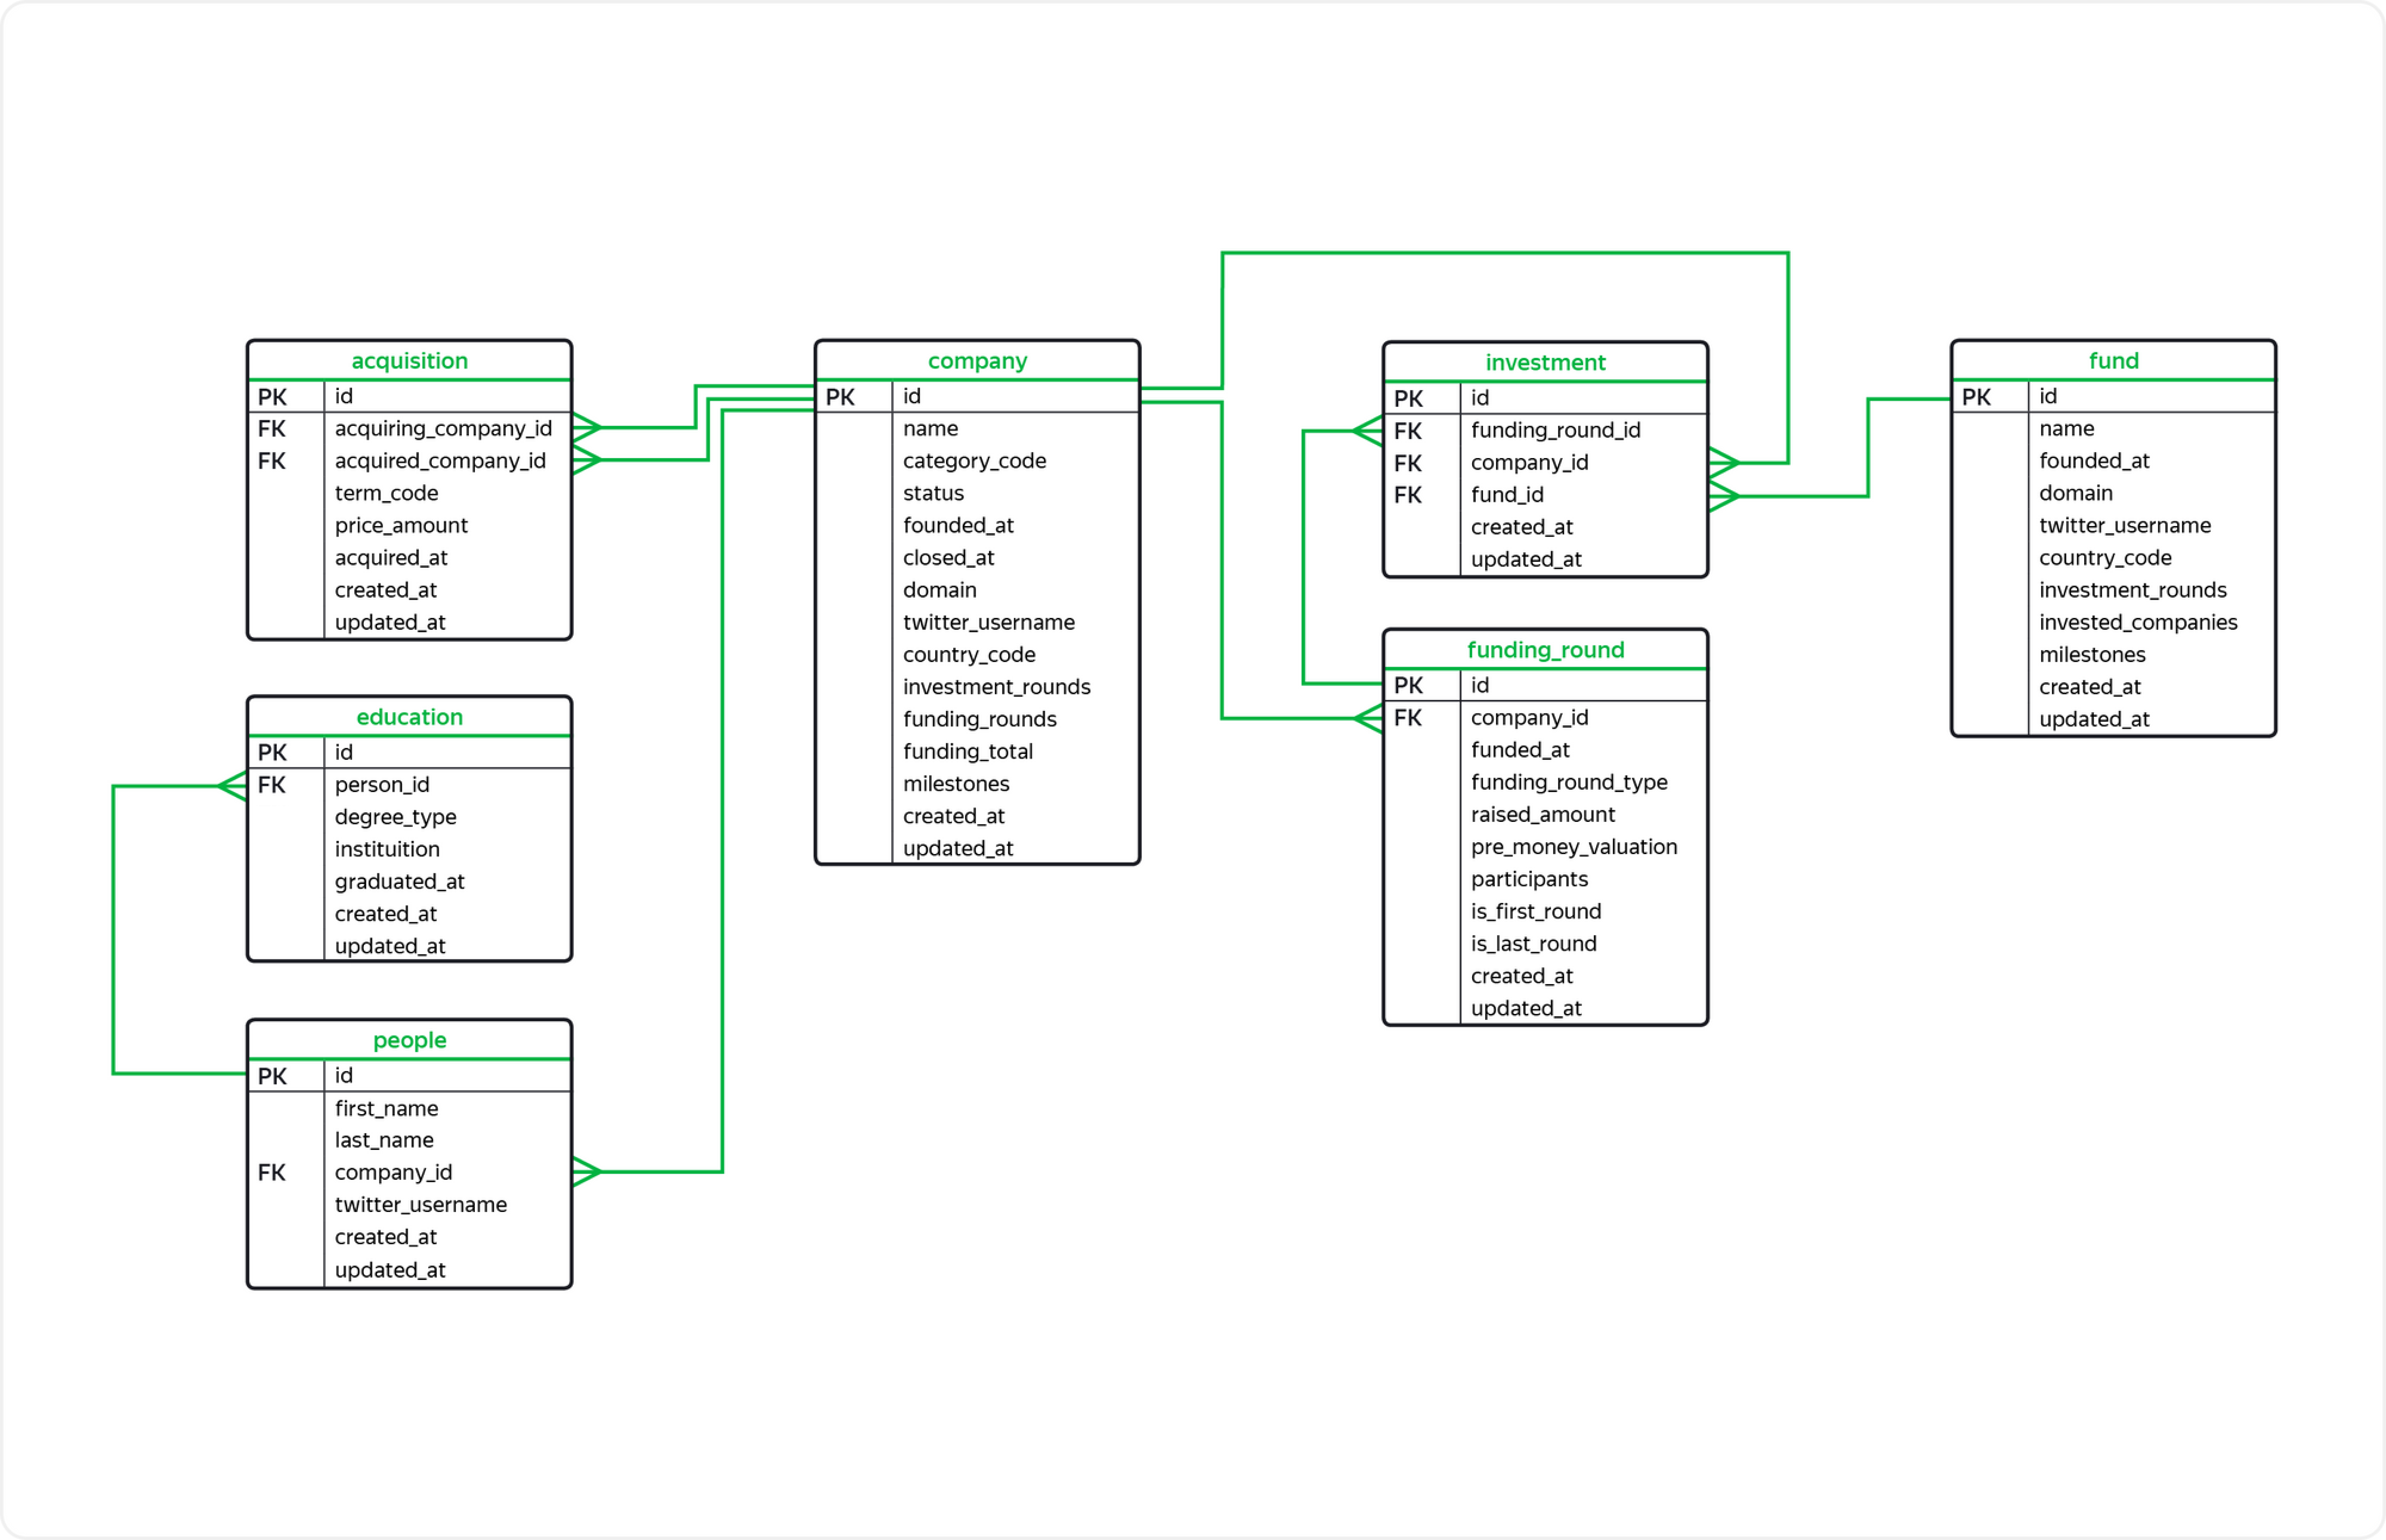

## Исследование

1. Посчитаем, сколько компаний закрылось.

In [ ]:
SELECT 
    COUNT(*)
FROM company
WHERE status = 'closed';

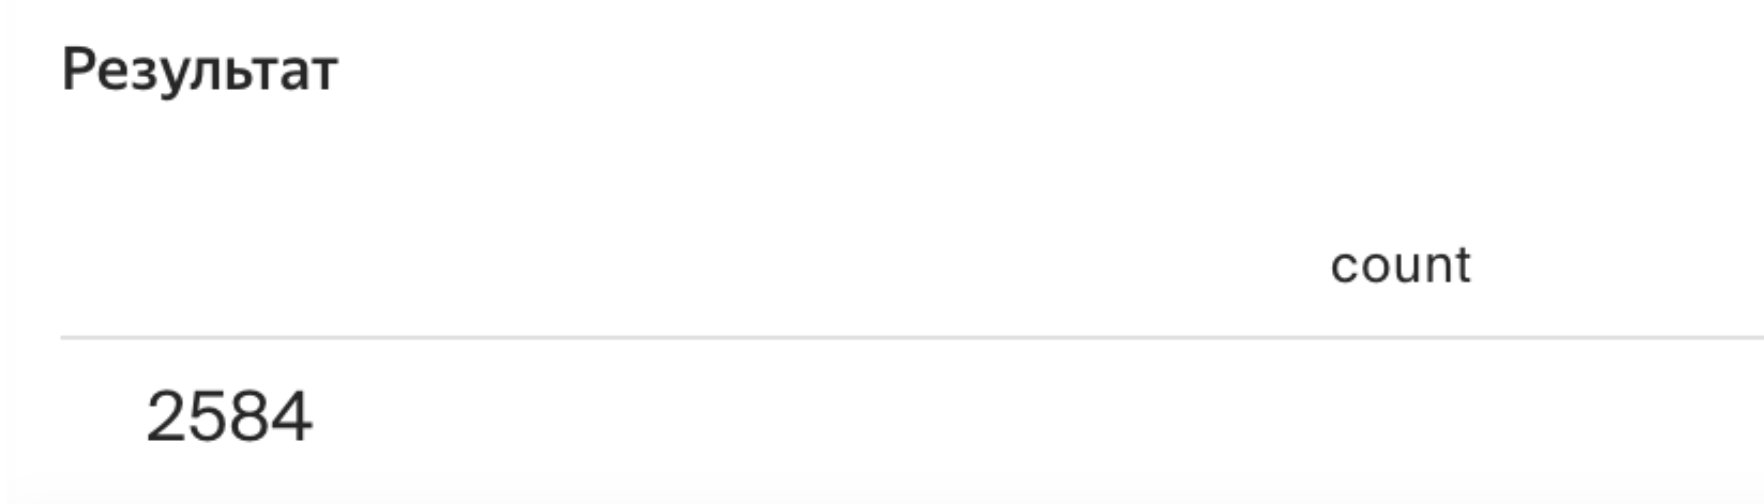

2. Отобразим количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируем таблицу по убыванию значений в поле funding_total.

In [ ]:
SELECT
       funding_total
FROM company
WHERE category_code = 'news'
AND country_code = 'USA'
ORDER BY funding_total DESC;

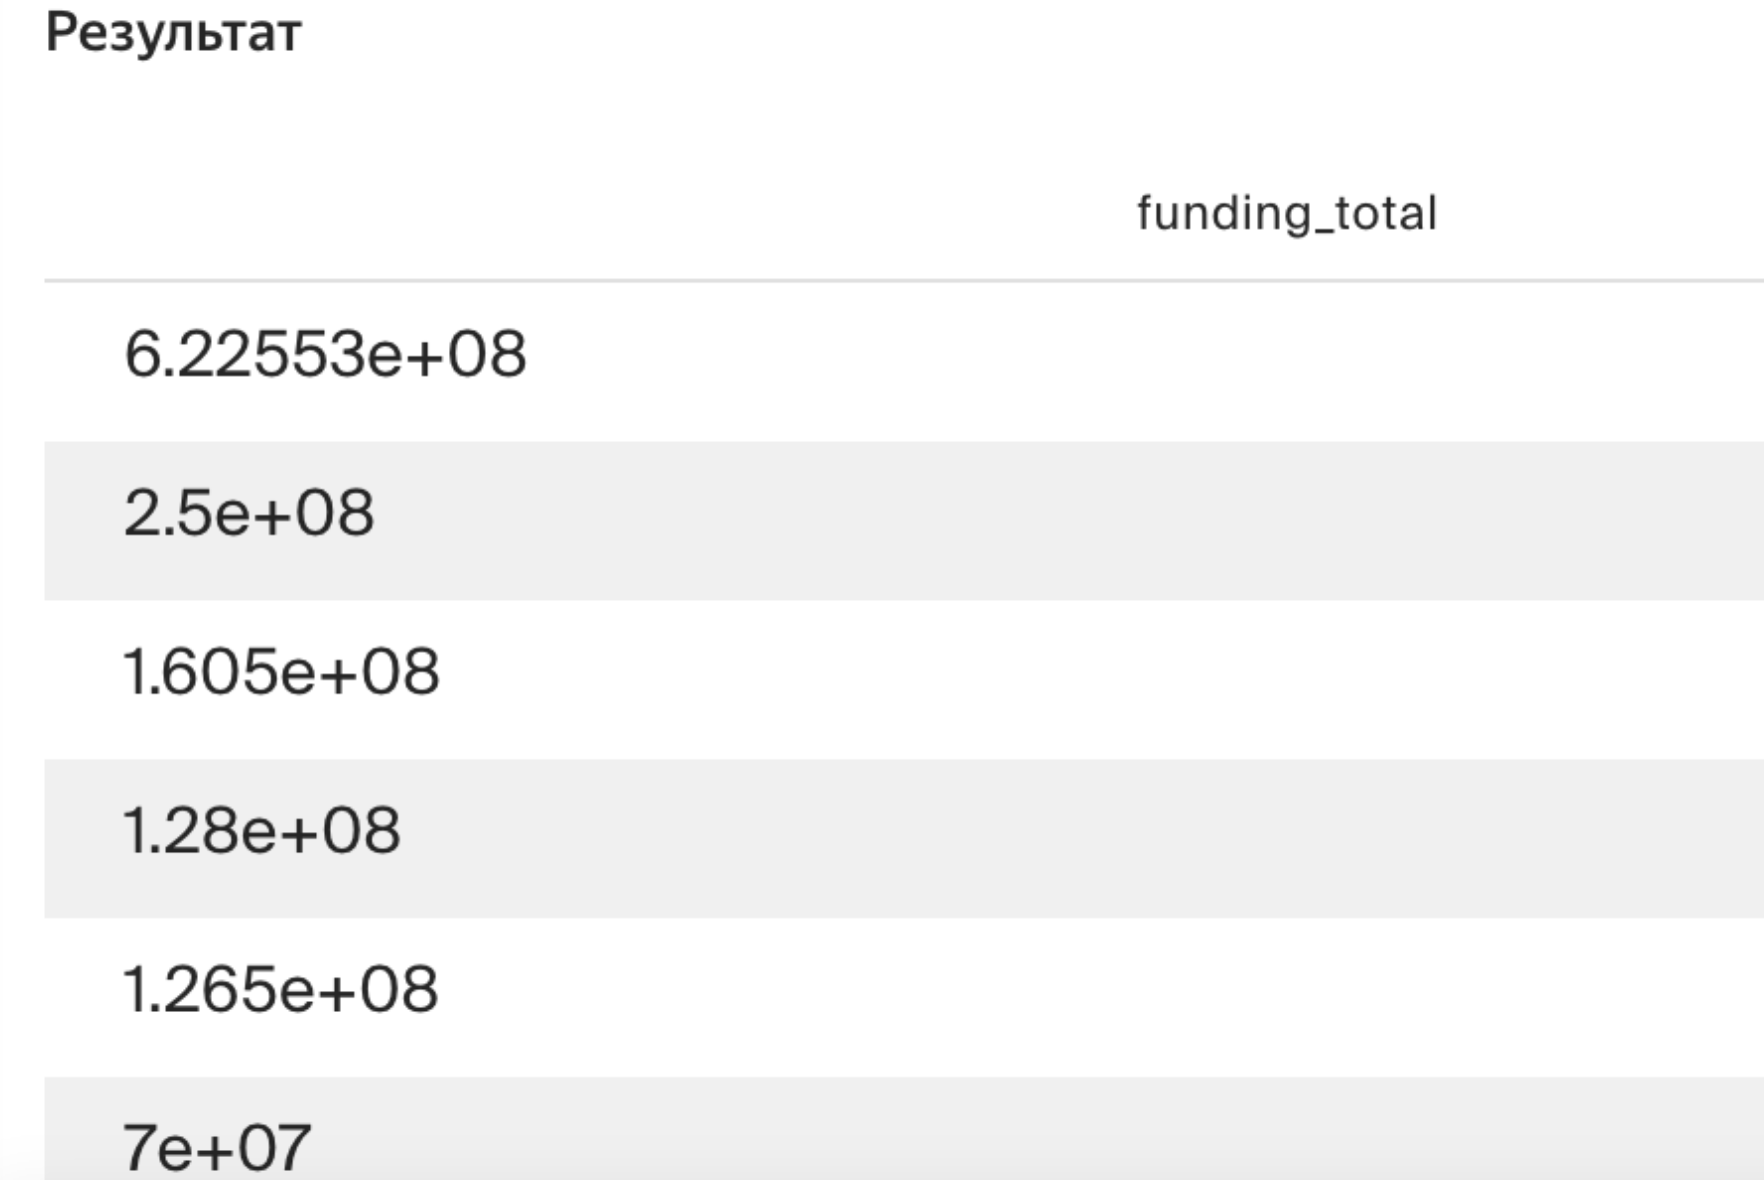

3. Найдем общую сумму сделок по покупке одних компаний другими в долларах. Отберем сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
AND acquired_at::date BETWEEN '2011-01-01' AND '2013-12-31';

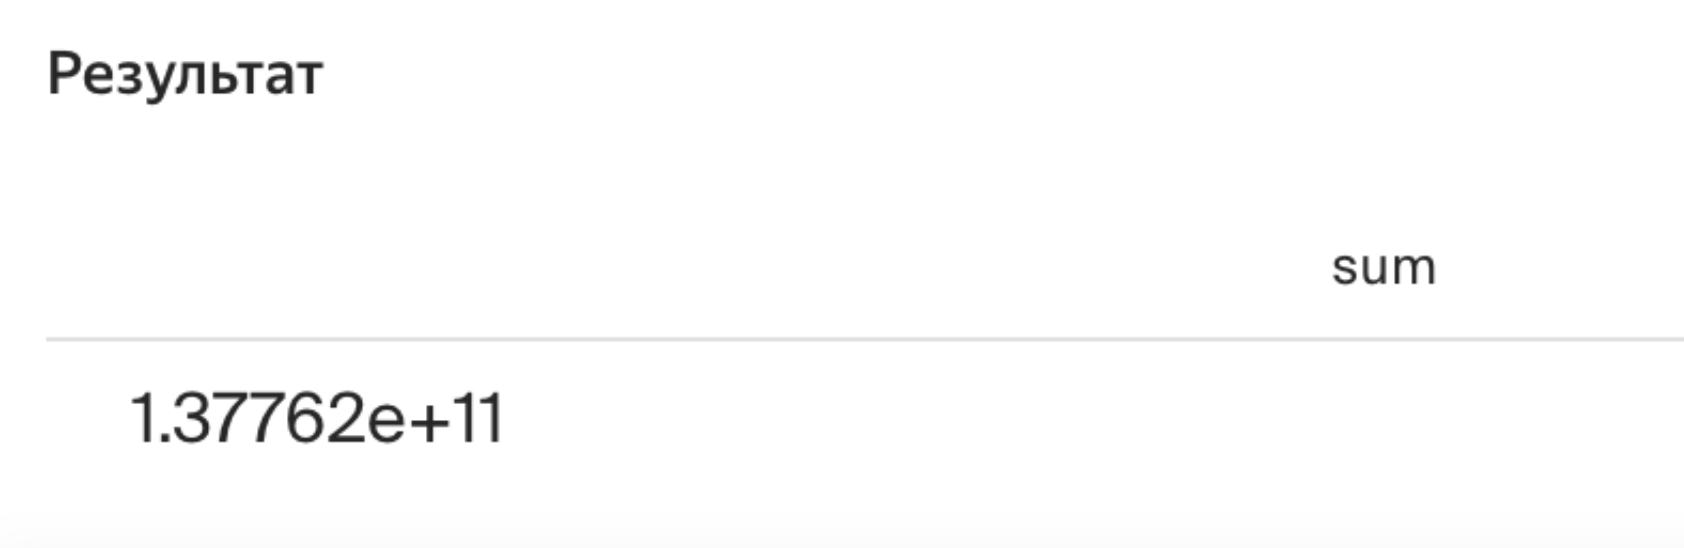

4. Отобразим имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT first_name,
        last_name,
        twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%';

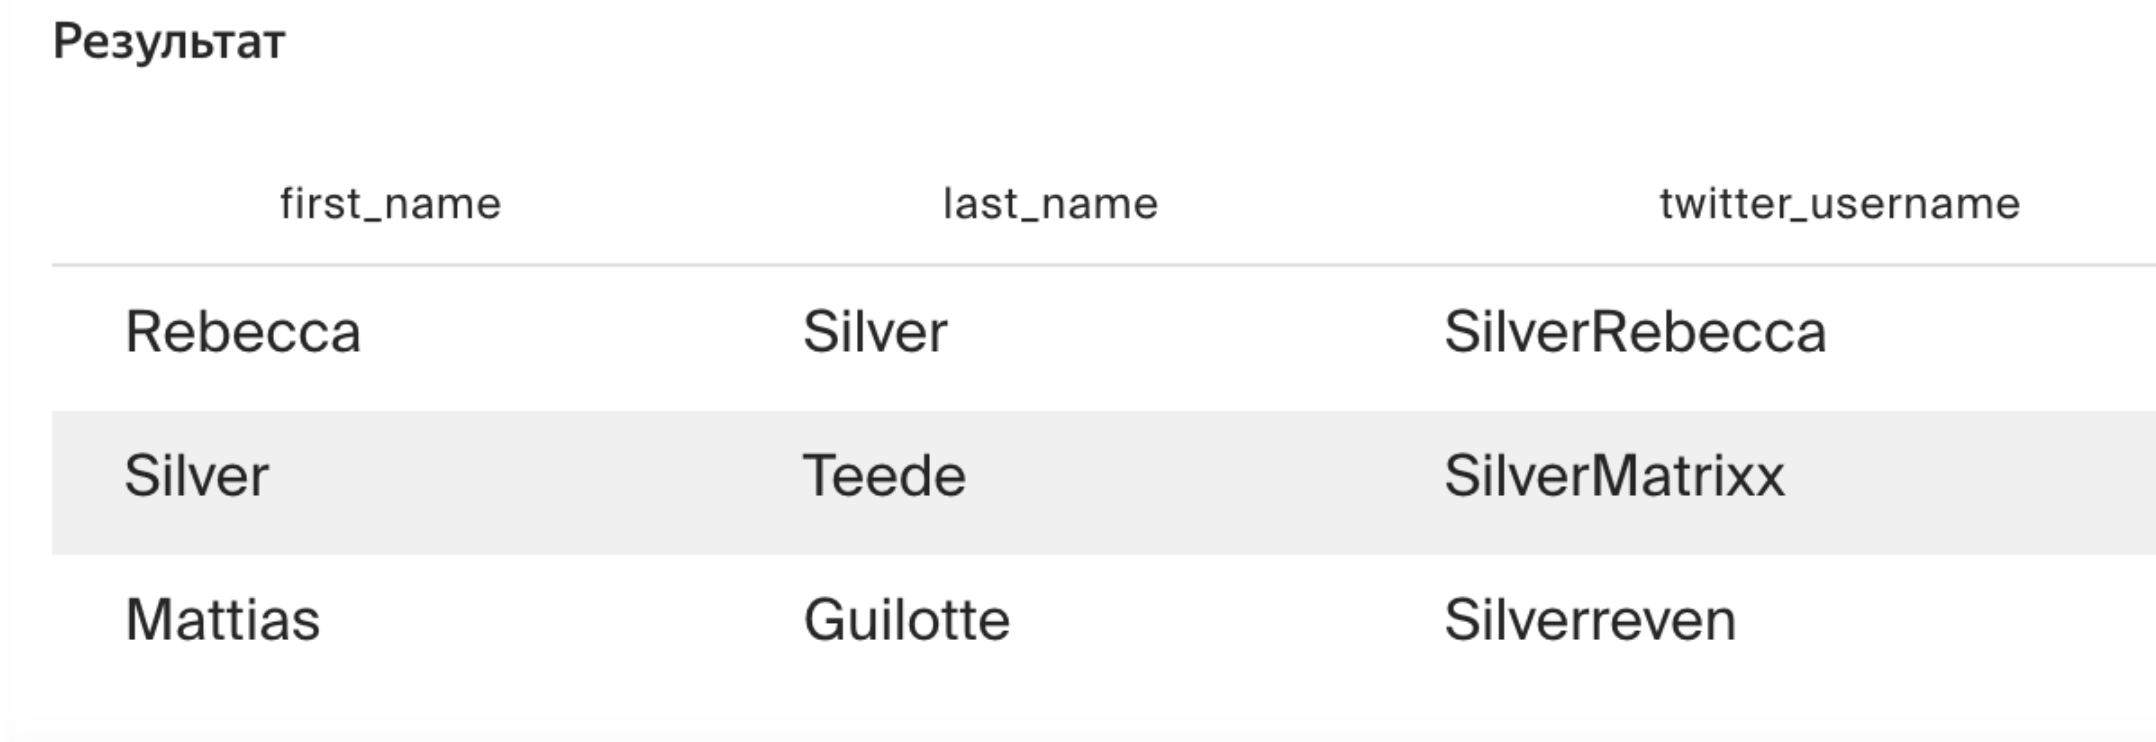

5. Выведем на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT*
FROM people
WHERE twitter_username LIKE '%money%'
AND last_name LIKE 'K%';

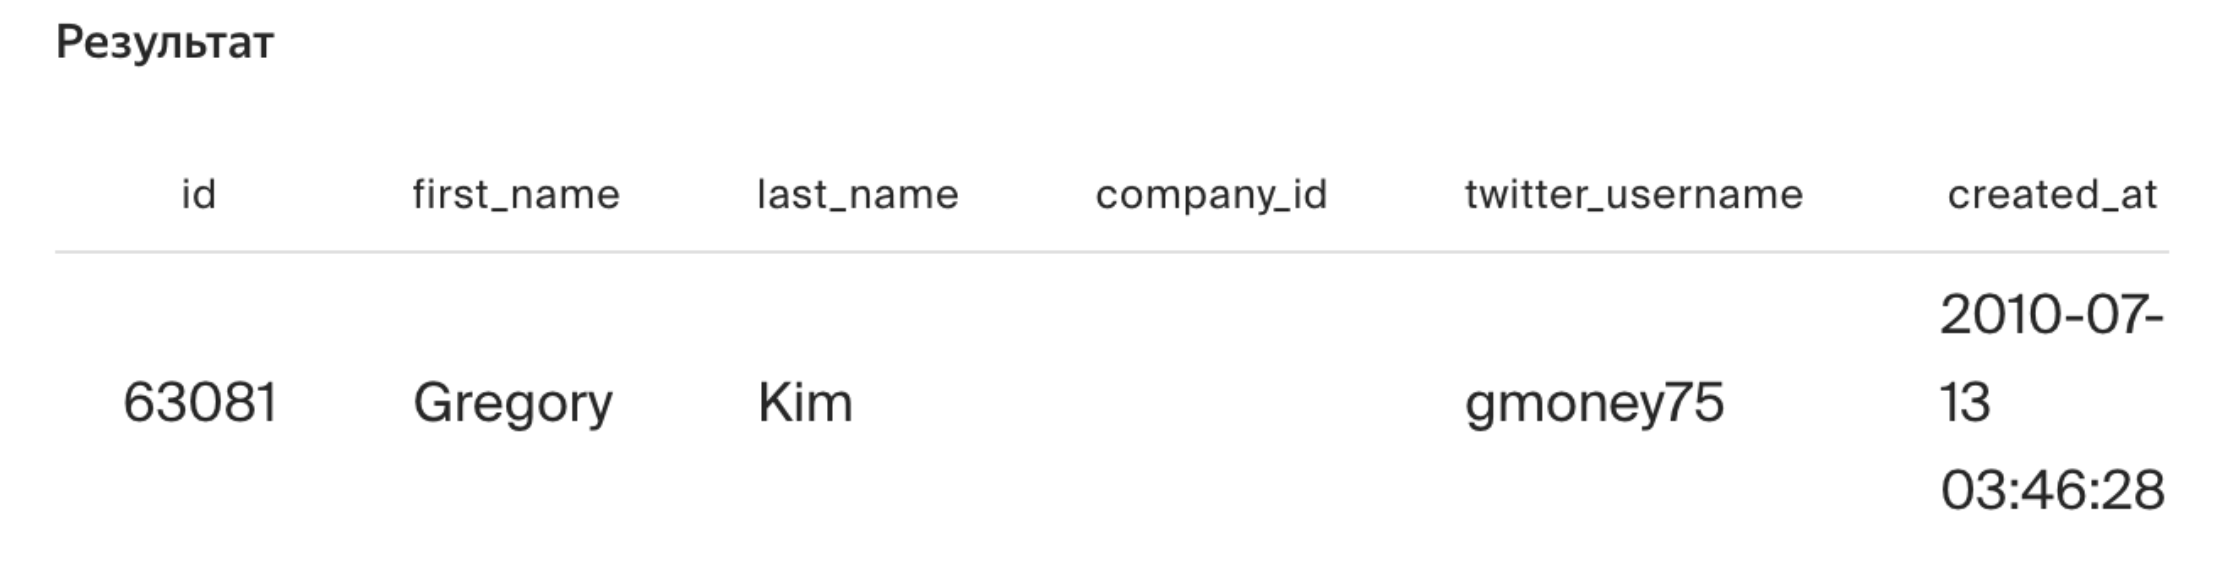

6. Для каждой страны отобразим общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируем данные по убыванию суммы.

In [ ]:
SELECT country_code,
        SUM(funding_total) AS sum_total
FROM company
GROUP BY country_code
ORDER BY sum_total DESC;

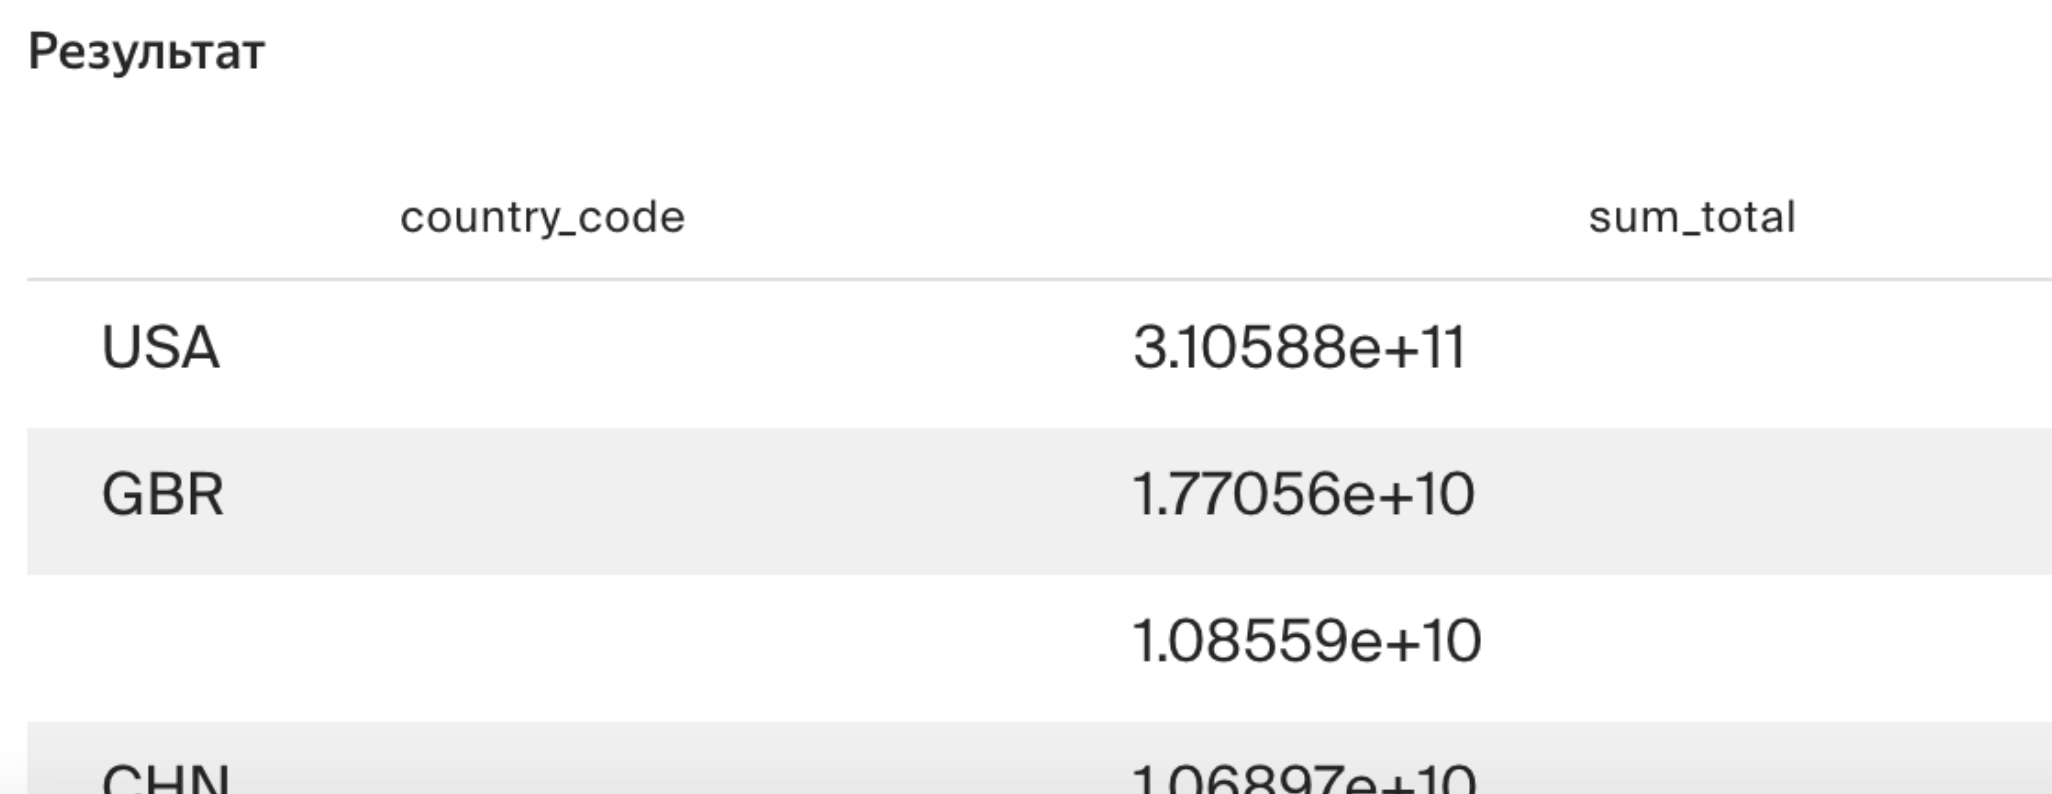

7. Составим таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату. Оставим в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at AS funded_data,
    MIN(raised_amount) AS min_amount,
    MAX(raised_amount) AS max_amount
FROM funding_round
GROUP BY funded_data
HAVING MIN(raised_amount) != 0 
AND MIN(raised_amount) != MAX(raised_amount); 

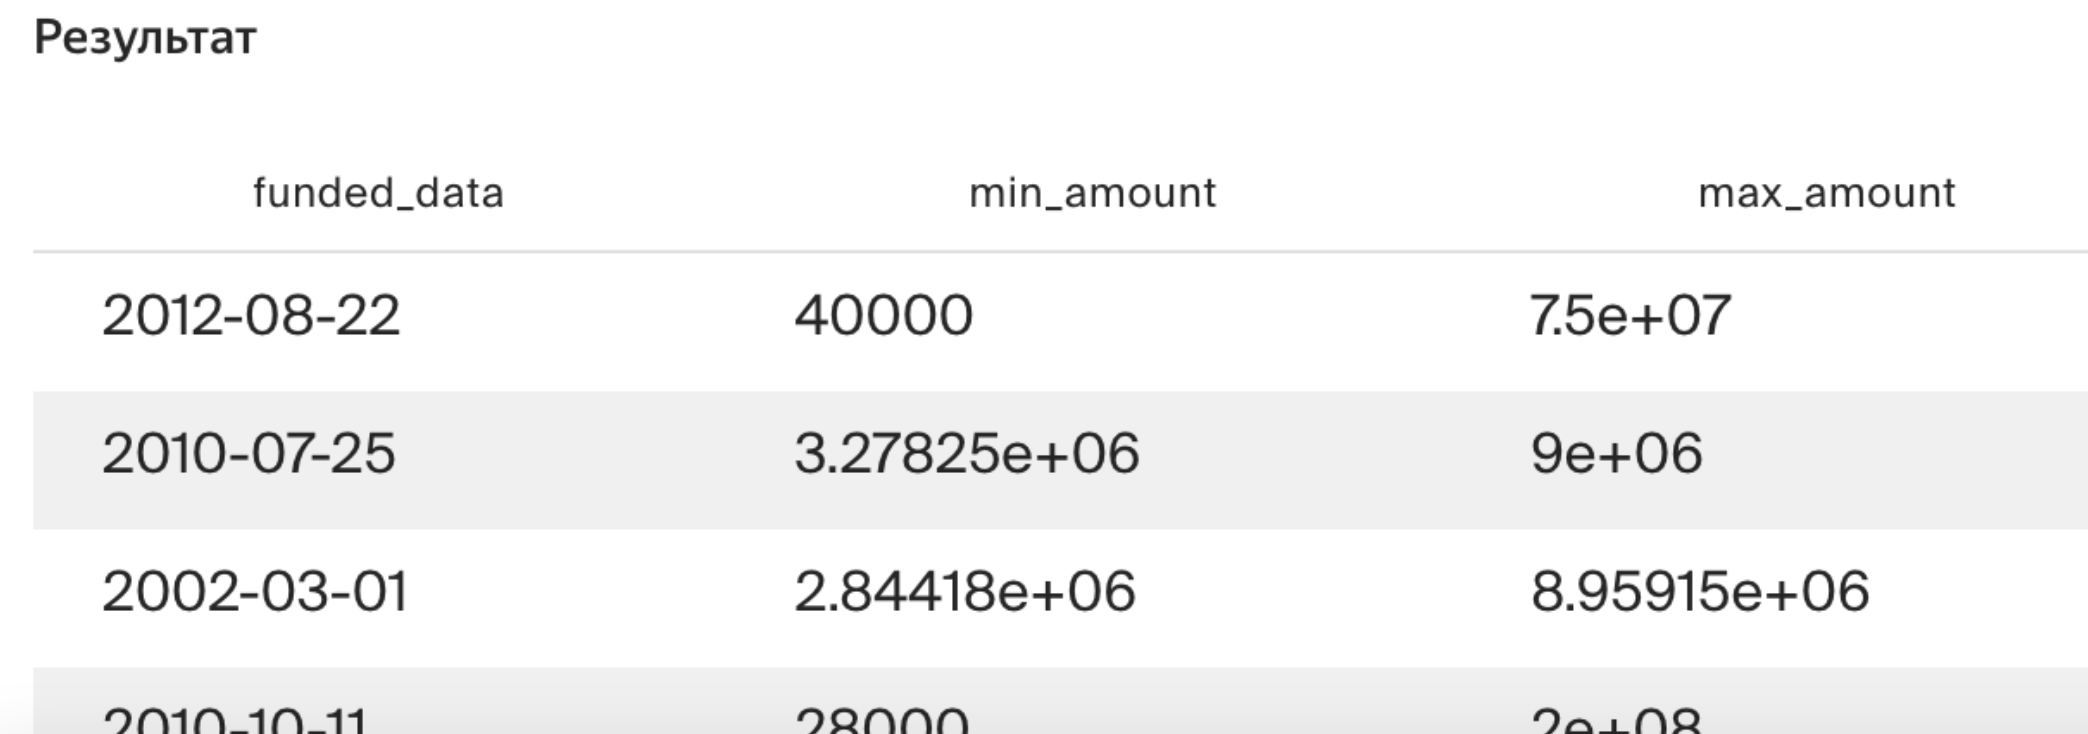

8. Создадим поле с категориями: Для фондов, которые инвестируют в 100 и более компаний, назначим категорию high_activity. Для фондов, которые инвестируют в 20 и более компаний до 100, назначим категорию middle_activity. Если количество инвестируемых компаний фонда не достигает 20, назначим категорию low_activity. Отобразим все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT*,
      CASE
           WHEN invested_companies  >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
           ELSE 'low_activity'
      END
FROM fund;

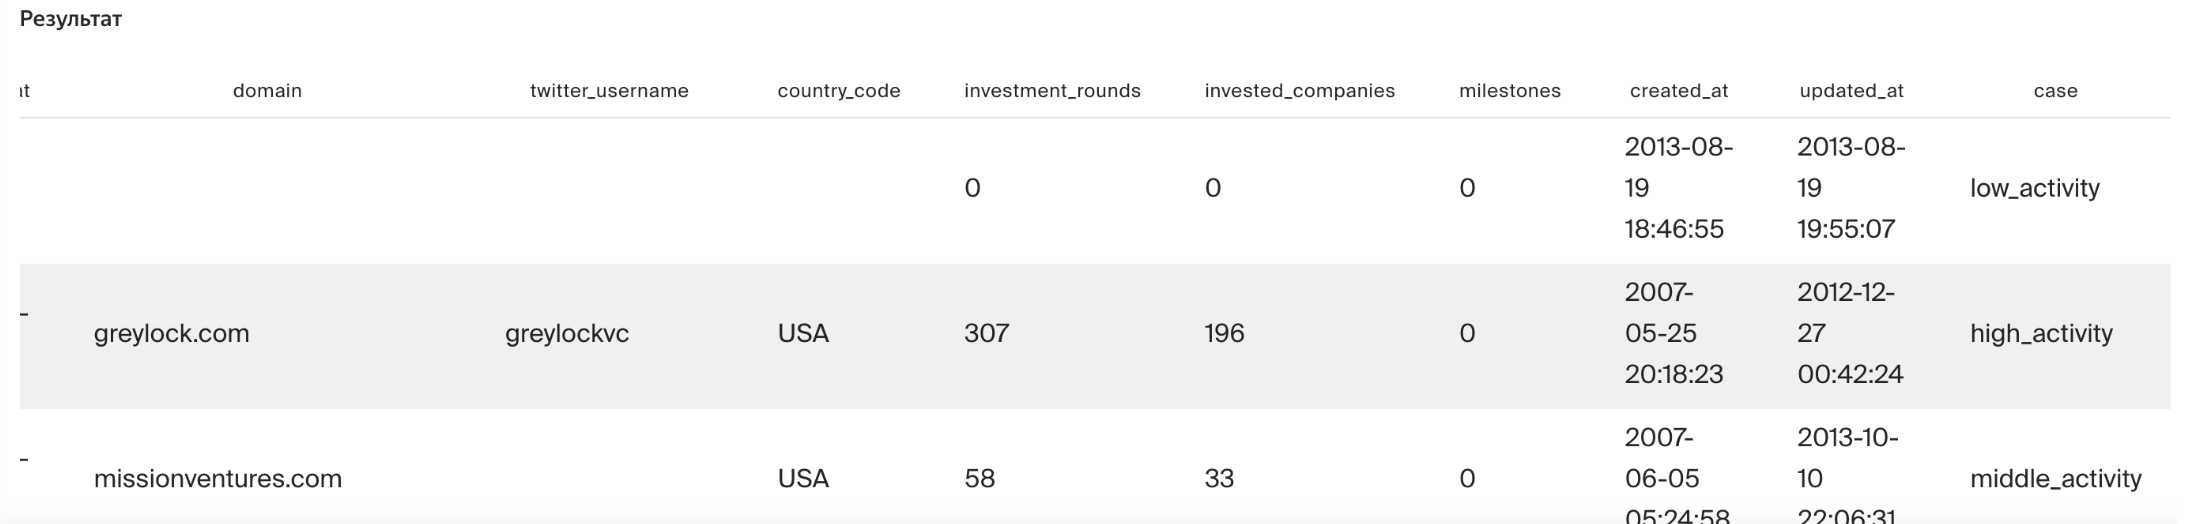

9. Для каждой из категорий, назначенных в предыдущем задании, посчитаем округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведим на экран категории и среднее число инвестиционных раундов. Отсортируем таблицу по возрастанию среднего.

In [ ]:
SELECT ROUND(AVG(investment_rounds)) AS perc,
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund
GROUP BY activity
ORDER BY ROUND(AVG(investment_rounds));

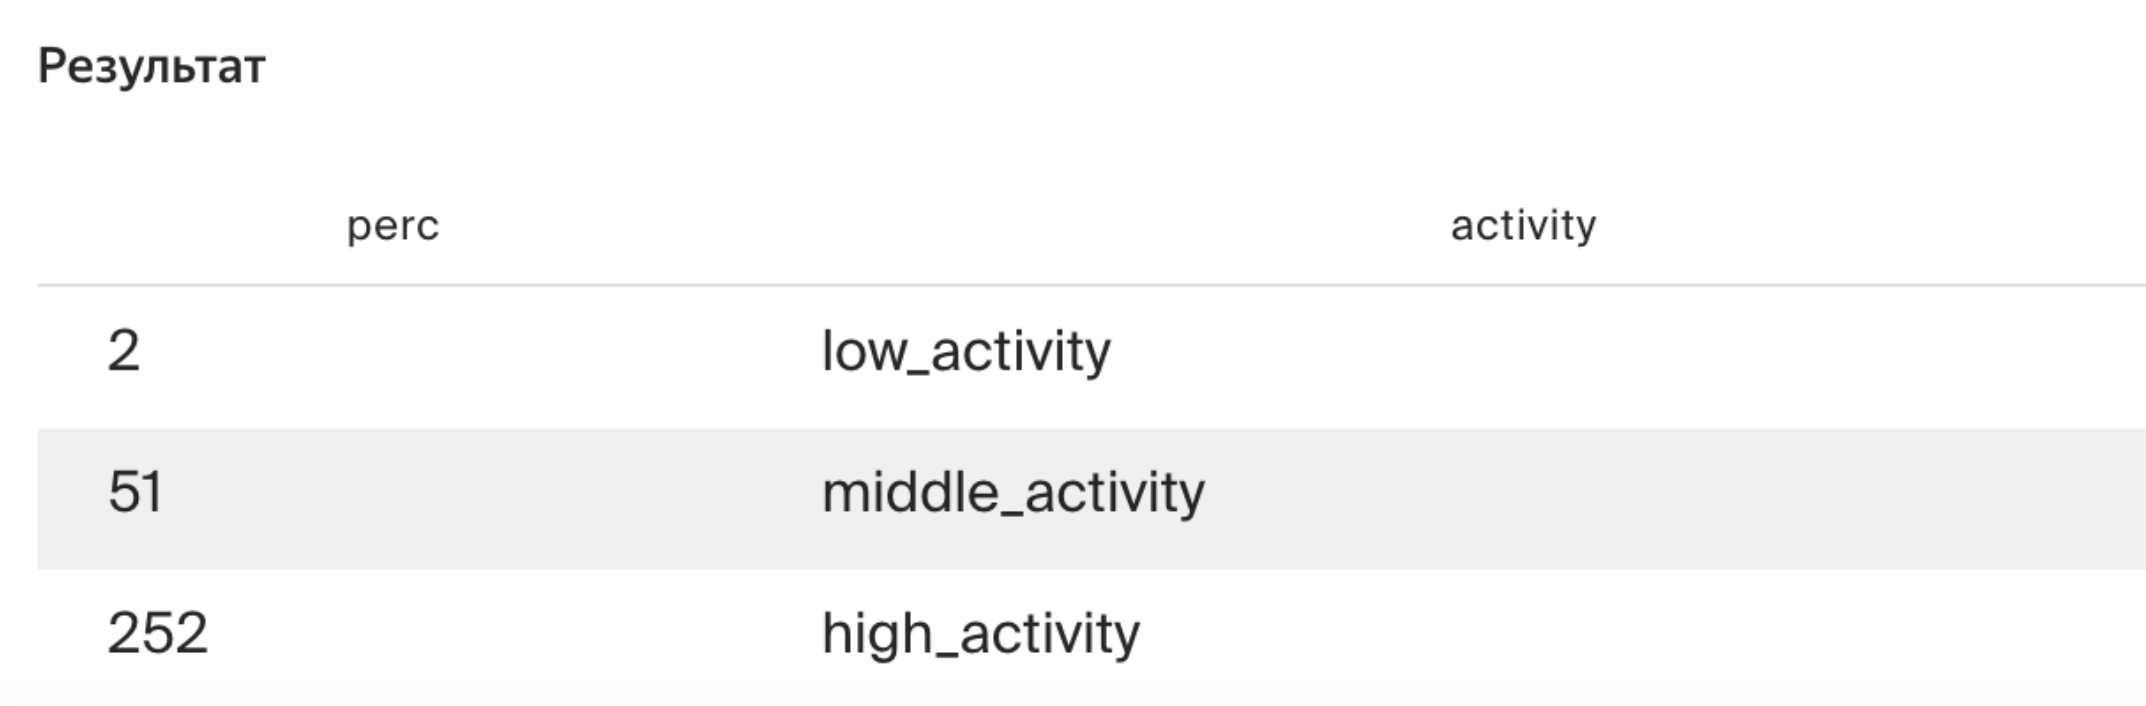

10. Проанализируем, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы. Для каждой страны посчитаем минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключим страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Выгрузим десять самых активных стран-инвесторов. Отсортируем таблицу по среднему количеству компаний от большего к меньшему, а затем по коду страны в лексикографическом порядке.

In [ ]:
SELECT
country_code,
MIN(invested_companies) AS min_count,
MAX(invested_companies) AS max_count,
AVG(invested_companies) AS avg_count


FROM fund
WHERE founded_at::date BETWEEN '2010-01-01' AND '2012-12-31'
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY avg_count DESC,country_code
LIMIT 10;

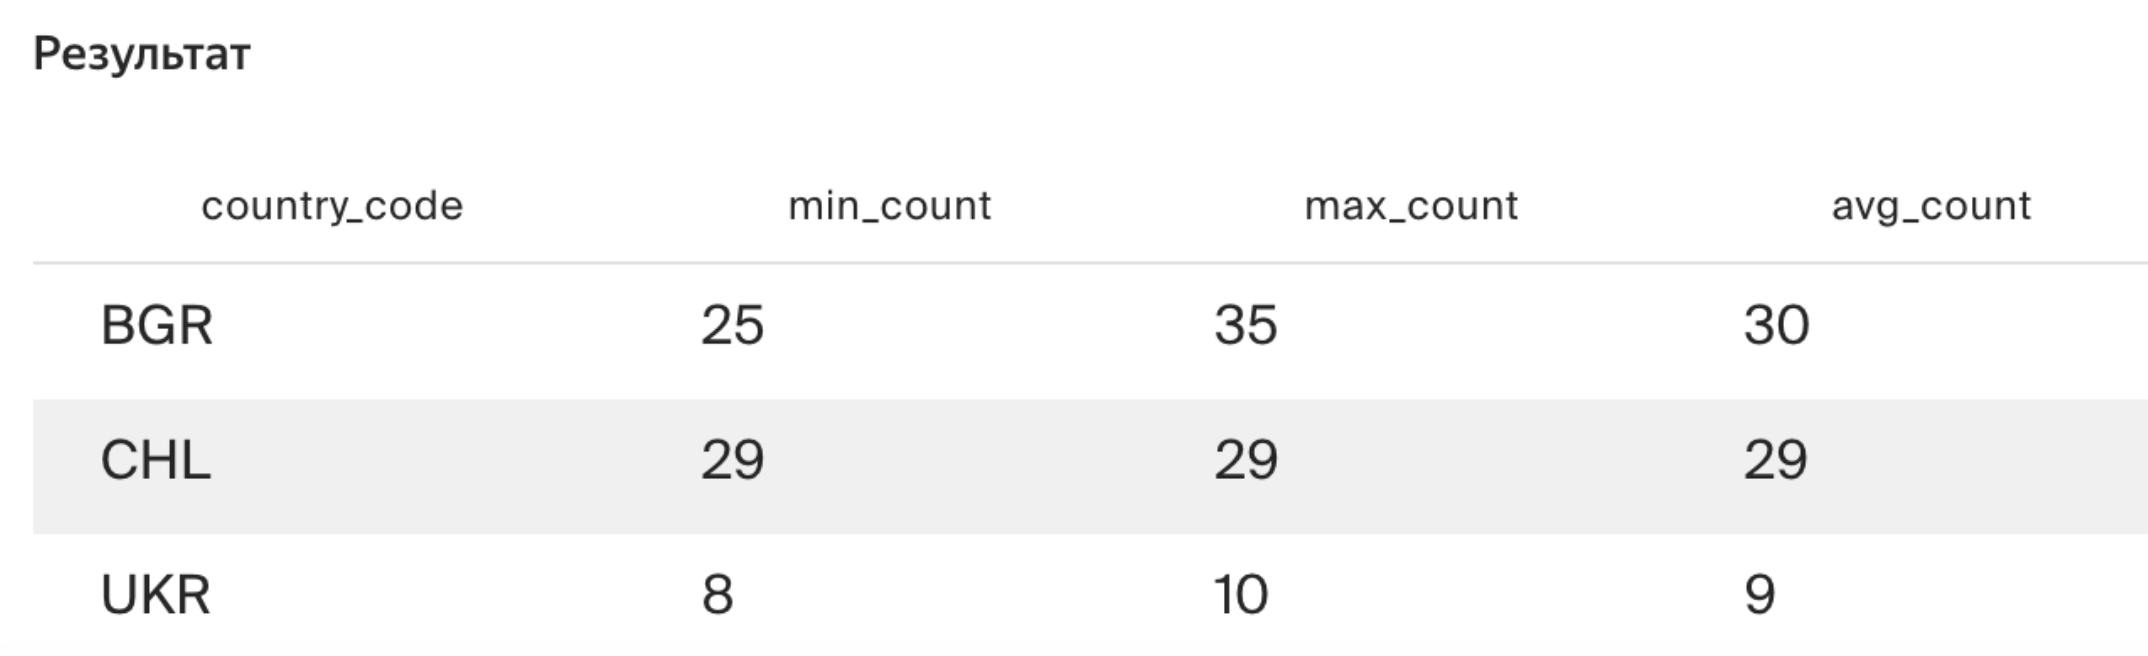

11. Отобразим имя и фамилию всех сотрудников стартапов. Добавим поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT p.first_name,
       p.last_name,
       e.instituition
FROM people AS p
LEFT OUTER JOIN education AS e ON p.id = e.person_id;

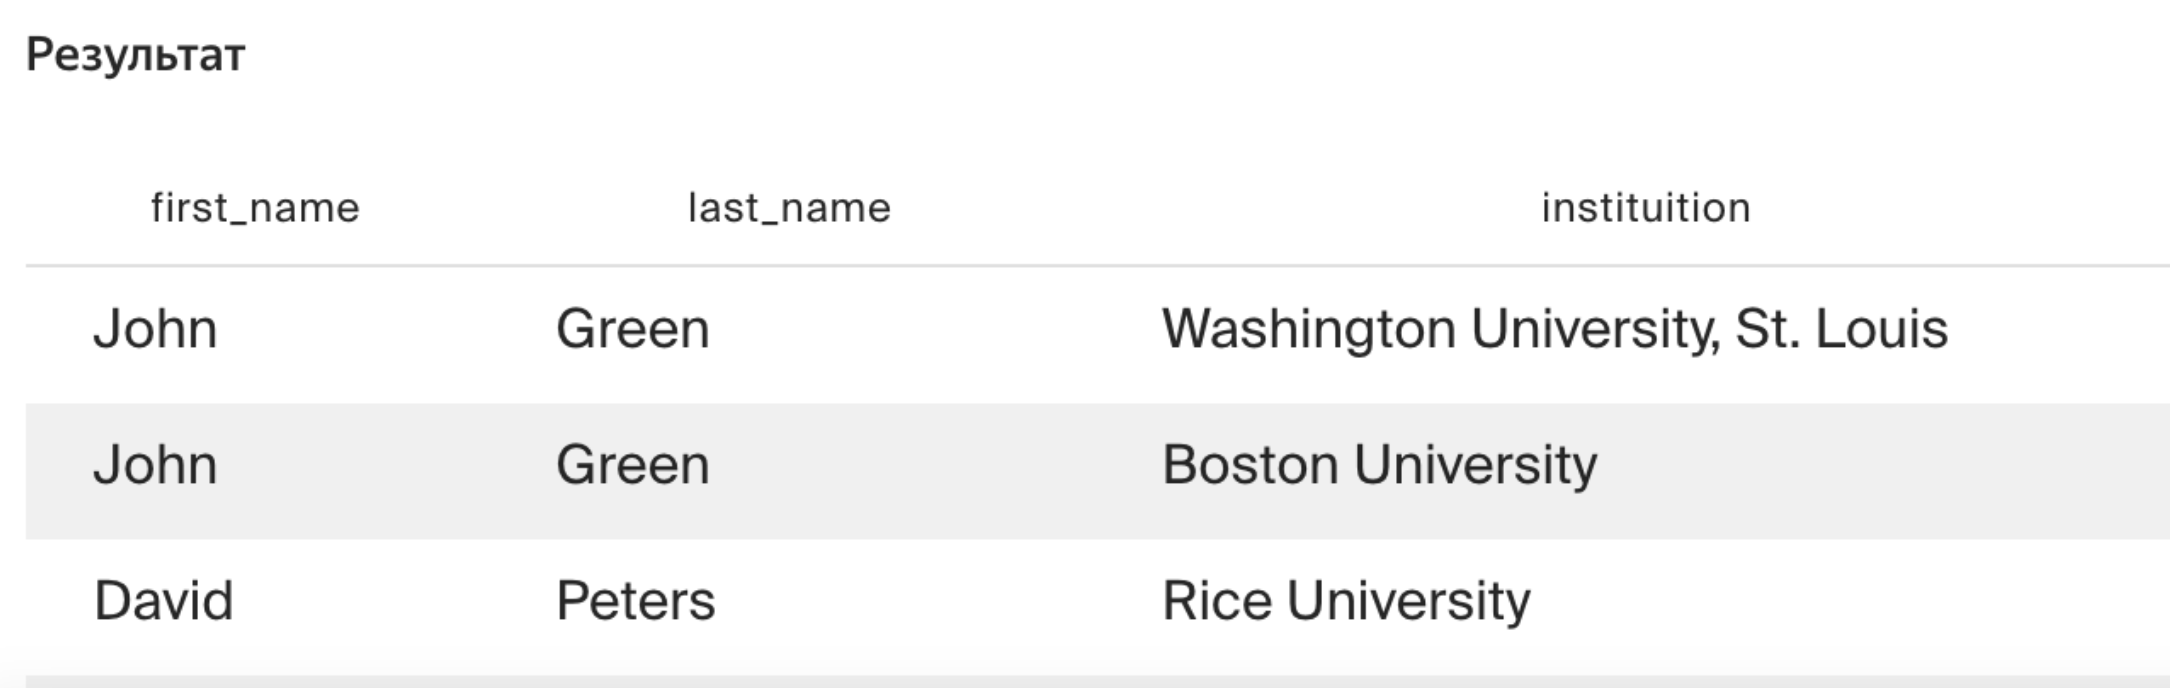

12. Для каждой компании найдем количество учебных заведений, которые окончили её сотрудники. Выведем название компании и число уникальных названий учебных заведений. Составим топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name,
       COUNT(DISTINCT e.instituition) AS count_instituition
FROM company AS c
JOIN people AS p ON c.id = p.company_id
JOIN education AS e ON p.id = e.person_id

GROUP BY c.name
ORDER BY count_instituition DESC
LIMIT 5;

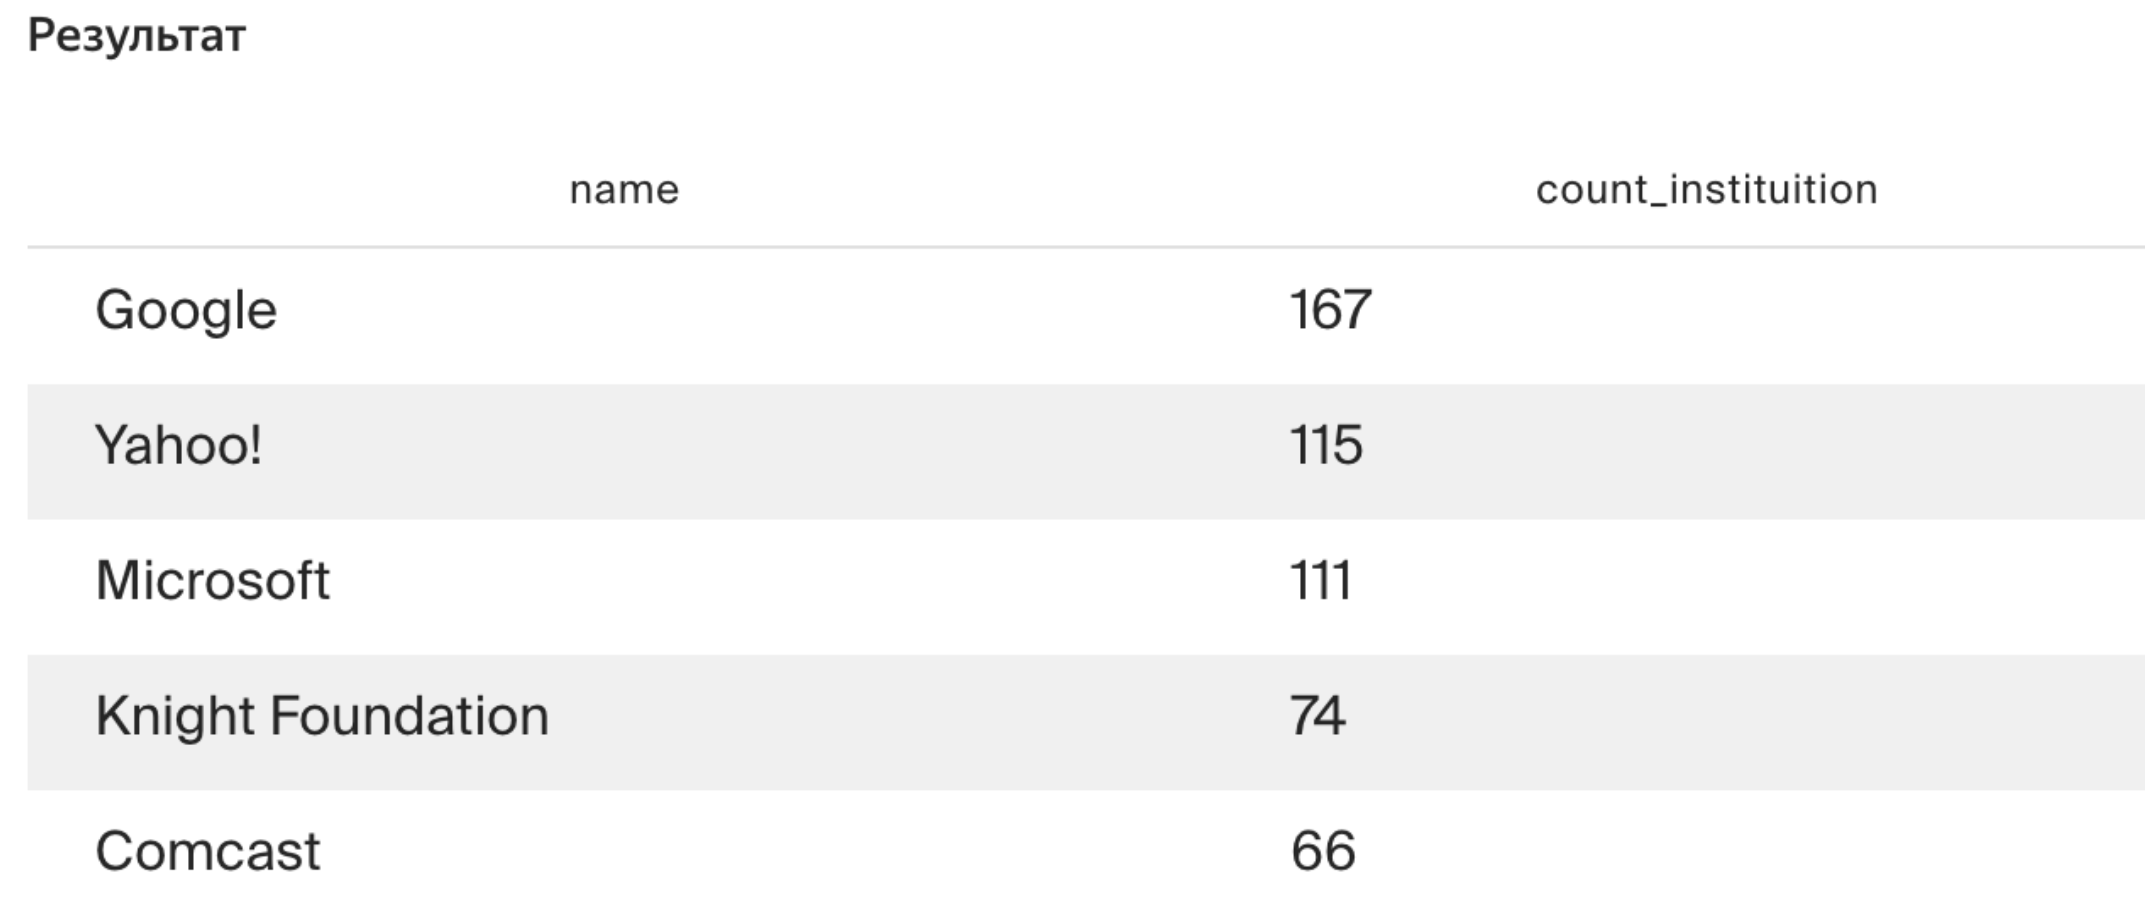

13. Составим список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
WITH  
--  подзапрос с псевдонимом
y AS (SELECT id ,
             name 
   FROM company
   WHERE status = 'closed'),
--  подзапрос с псевдонимом 
z AS (SELECT company_id
     FROM funding_round
     WHERE is_first_round = 1
     AND is_last_round = 1)
SELECT distinct y.name 
FROM y 
JOIN z ON y.id = z.company_id;

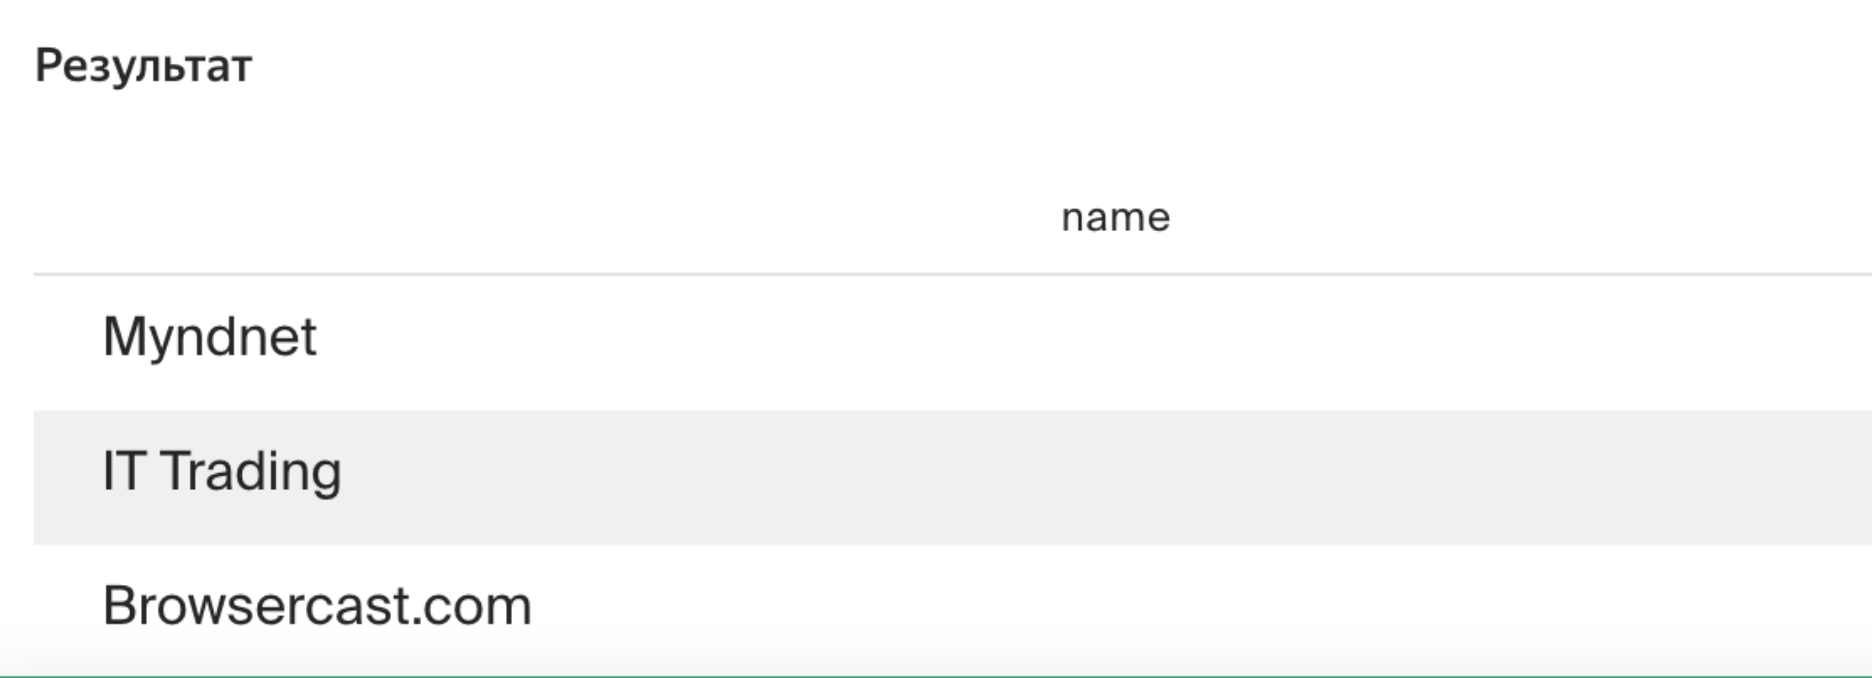

14. Составим список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
WITH  
--  подзапрос с псевдонимом
y AS (SELECT id ,
             name 
   FROM company
   WHERE status = 'closed'),
--  подзапрос с псевдонимом 
z AS (SELECT company_id
     FROM funding_round
     WHERE is_first_round = 1
     AND is_last_round = 1),
 --  подзапрос с псевдонимом     
x AS (SELECT id,
       company_id
      FROM people)    
SELECT distinct x.id 
FROM x
JOIN y ON x.company_id = y.id
JOIN z ON y.id = z.company_id;

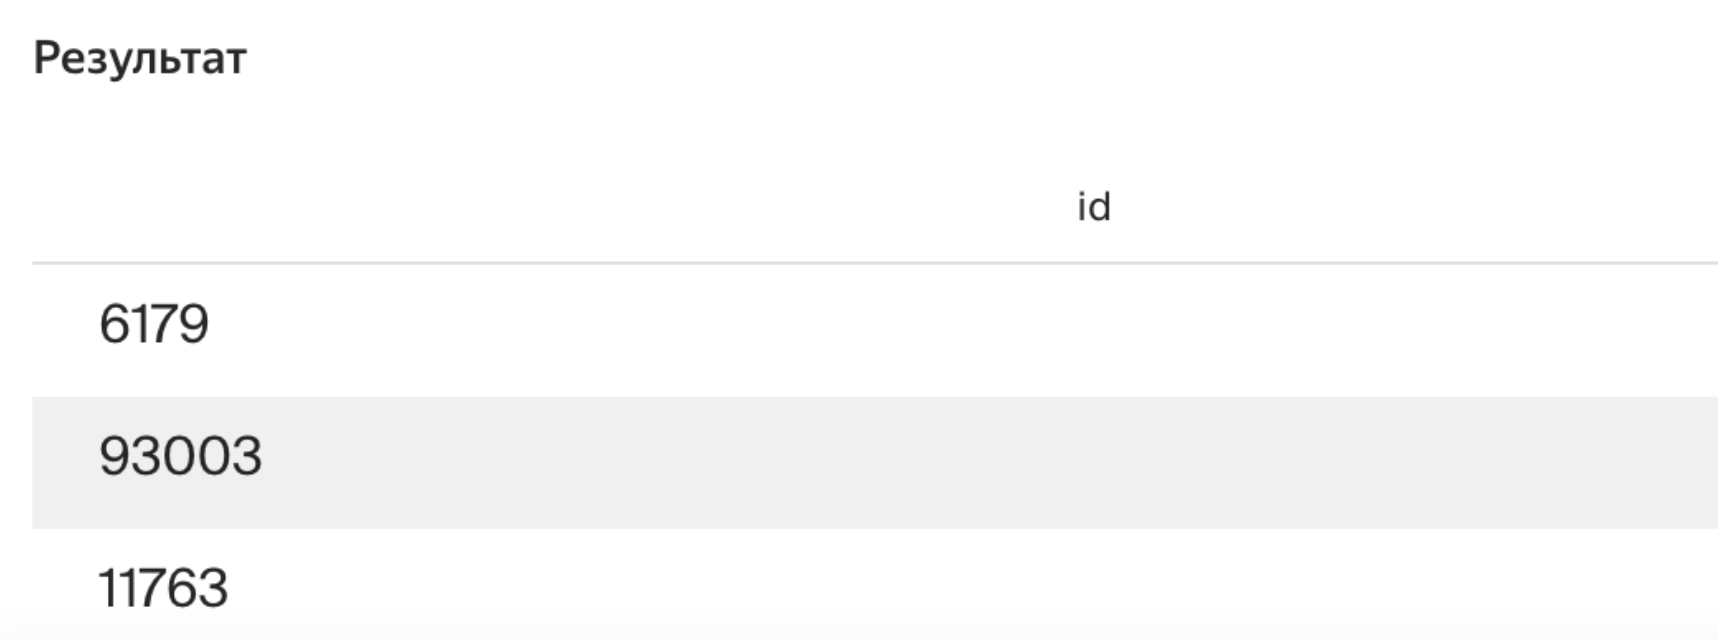

15. Составим таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
WITH  
--  подзапрос с псевдонимом
y AS (SELECT id ,
             name 
   FROM company
   WHERE status = 'closed'),
--  подзапрос с псевдонимом 
z AS (SELECT company_id
     FROM funding_round
     WHERE is_first_round = 1
     AND is_last_round = 1),
 --  подзапрос с псевдонимом     
x AS (SELECT id,
       company_id
      FROM people),
  --  подзапрос с псевдонимом      
d AS (SELECT instituition,
       person_id
      FROM education)
SELECT distinct x.id,
        d.instituition
FROM d
JOIN x ON d.person_id = x.id
JOIN y ON x.company_id = y.id
JOIN z ON y.id = z.company_id;

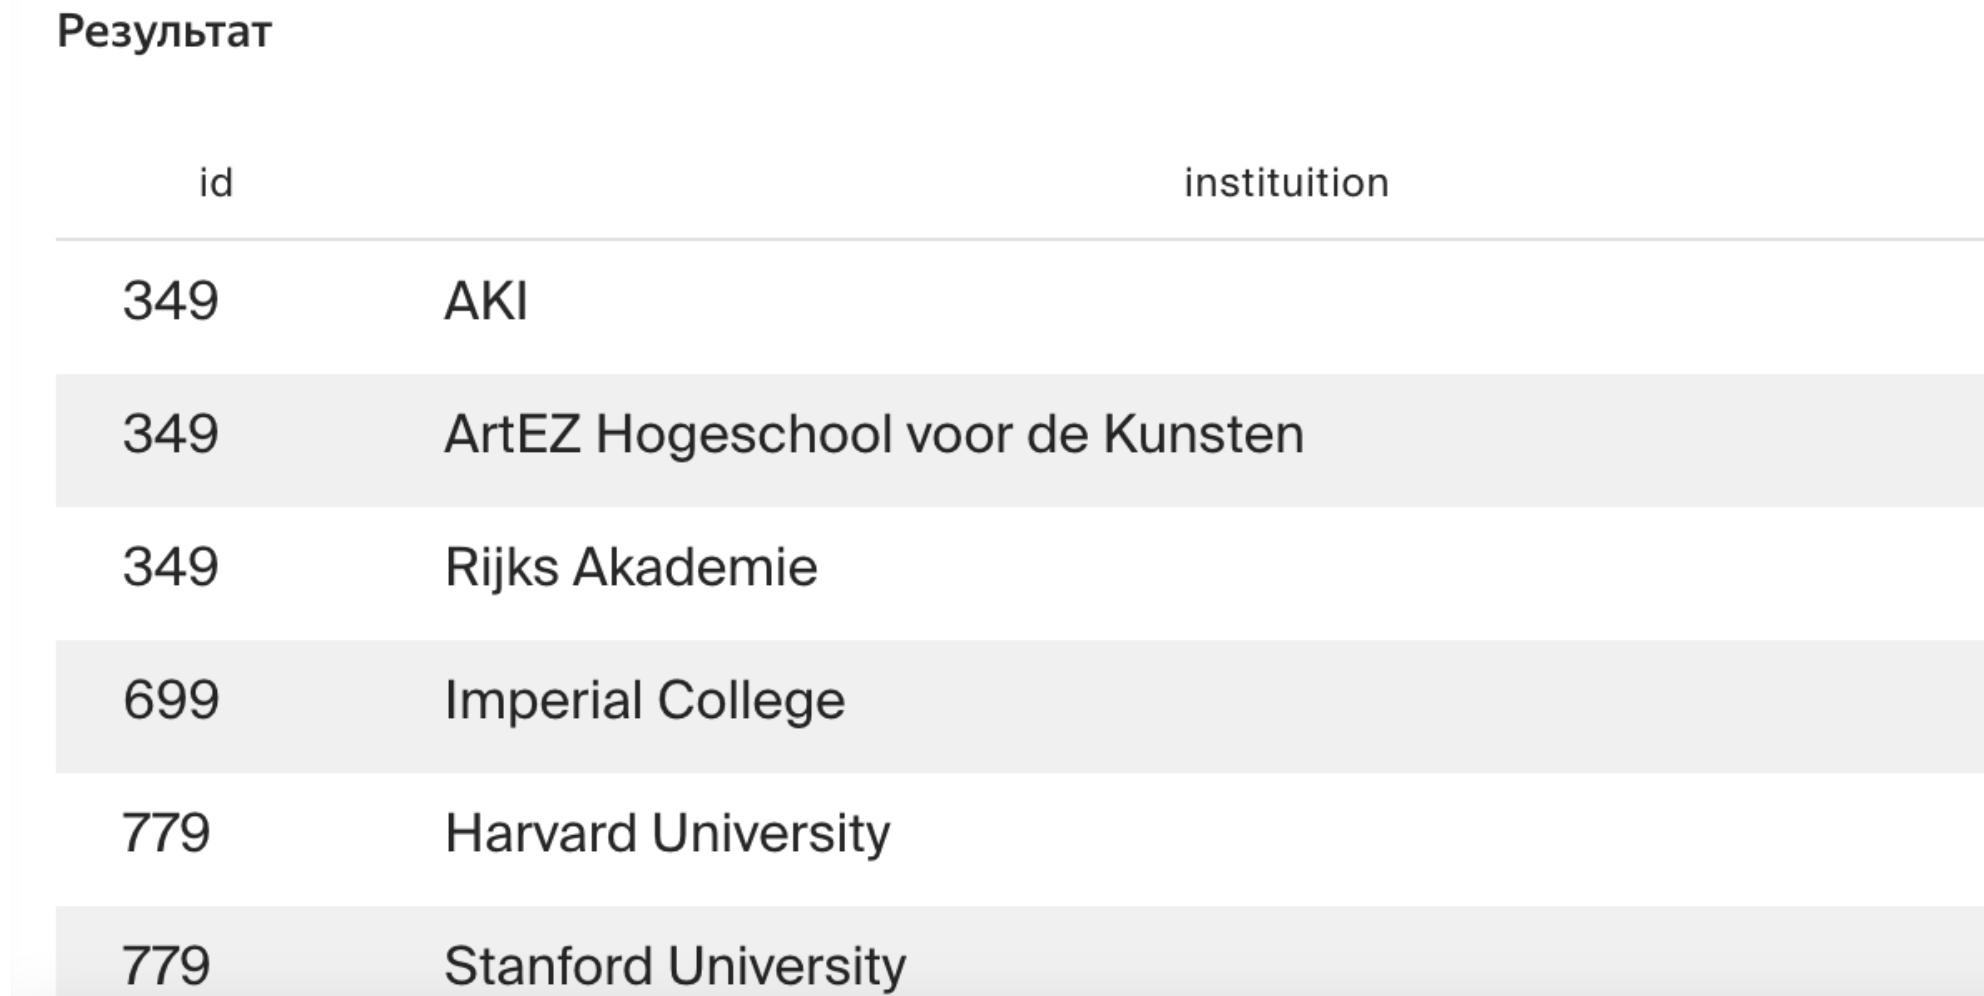

16. Посчитаем количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитем, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
SELECT p.id,
COUNT(e.instituition)
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id
WHERE p.company_id IN
(SELECT c.id
FROM company AS c
JOIN funding_round AS fr ON c.id = fr.company_id
WHERE STATUS ='closed'
AND is_first_round = 1
AND is_last_round = 1
GROUP BY c.id)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) >0;

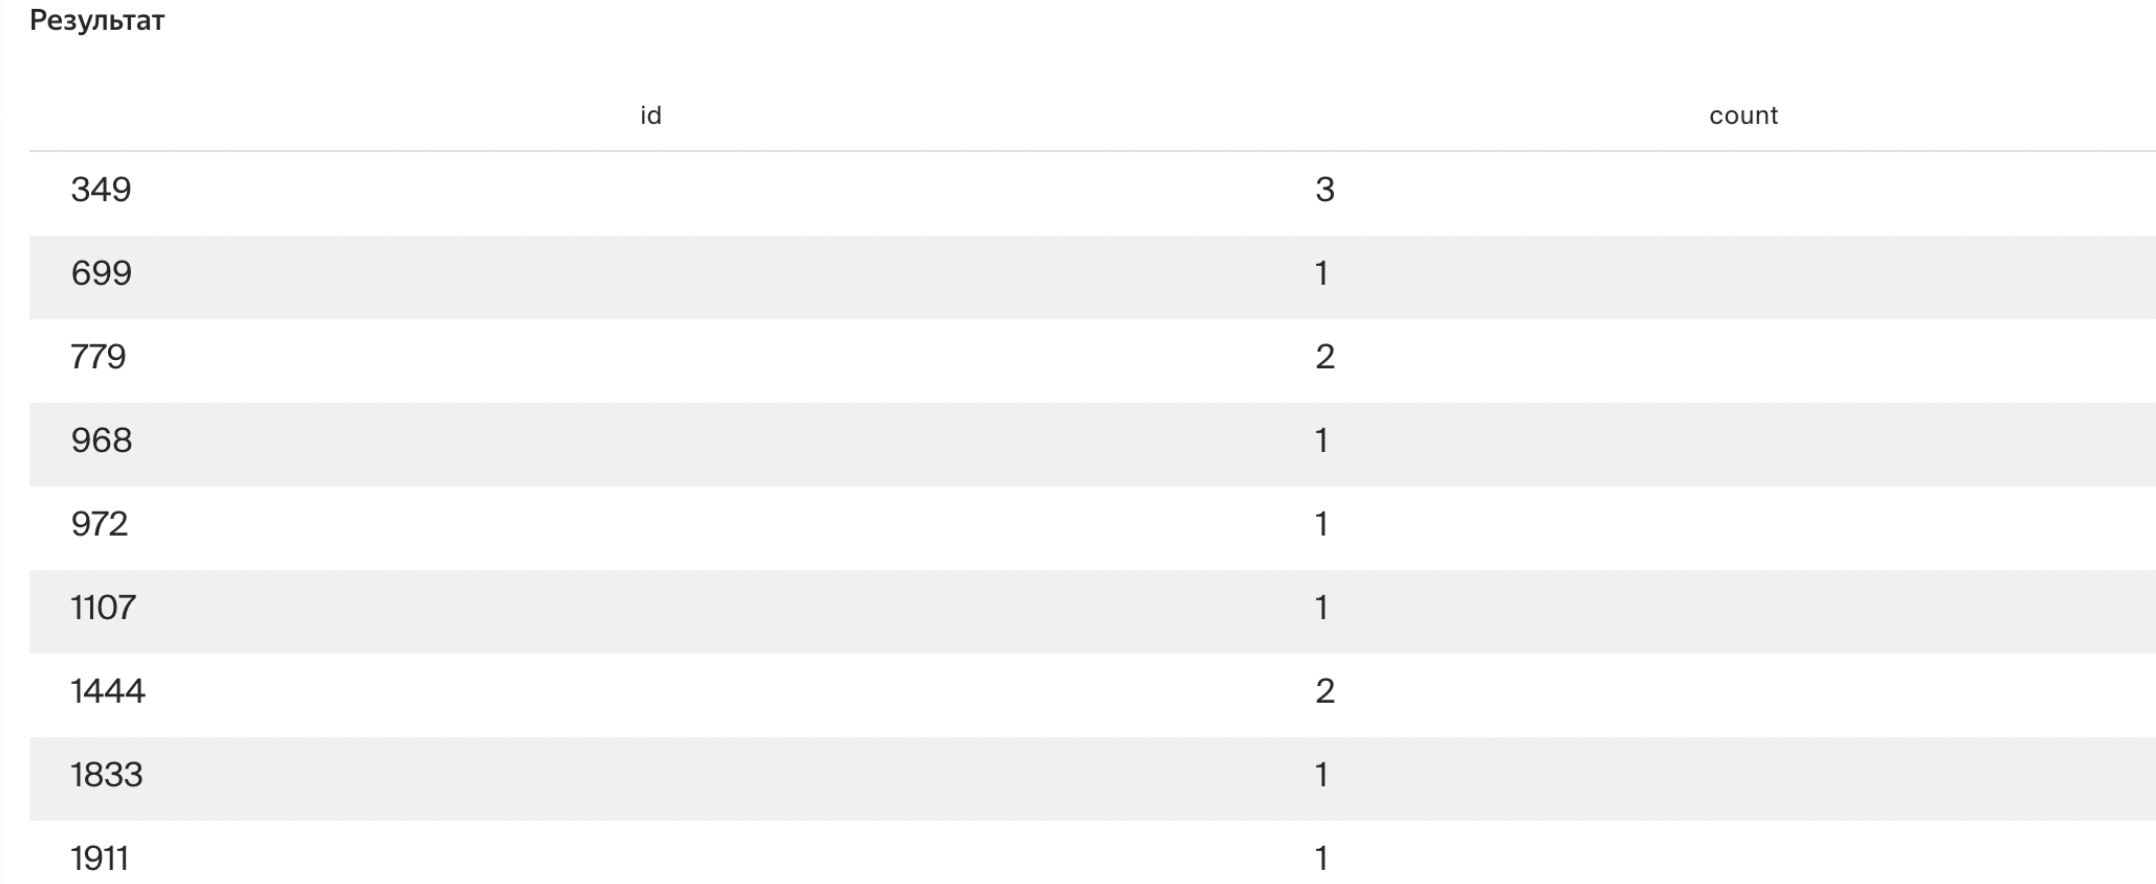

17. Дополним предыдущий запрос и выведем среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Выведем только одну запись, группировка здесь не понадобится.

In [ ]:
WITH base AS
(SELECT p.id,
COUNT(e.instituition)
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id
WHERE p.company_id IN
(SELECT c.id
FROM company AS c
JOIN funding_round AS fr ON c.id = fr.company_id
WHERE STATUS ='closed'
AND is_first_round = 1
AND is_last_round = 1
GROUP BY c.id)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) >0)
SELECT AVG(COUNT)
FROM base;

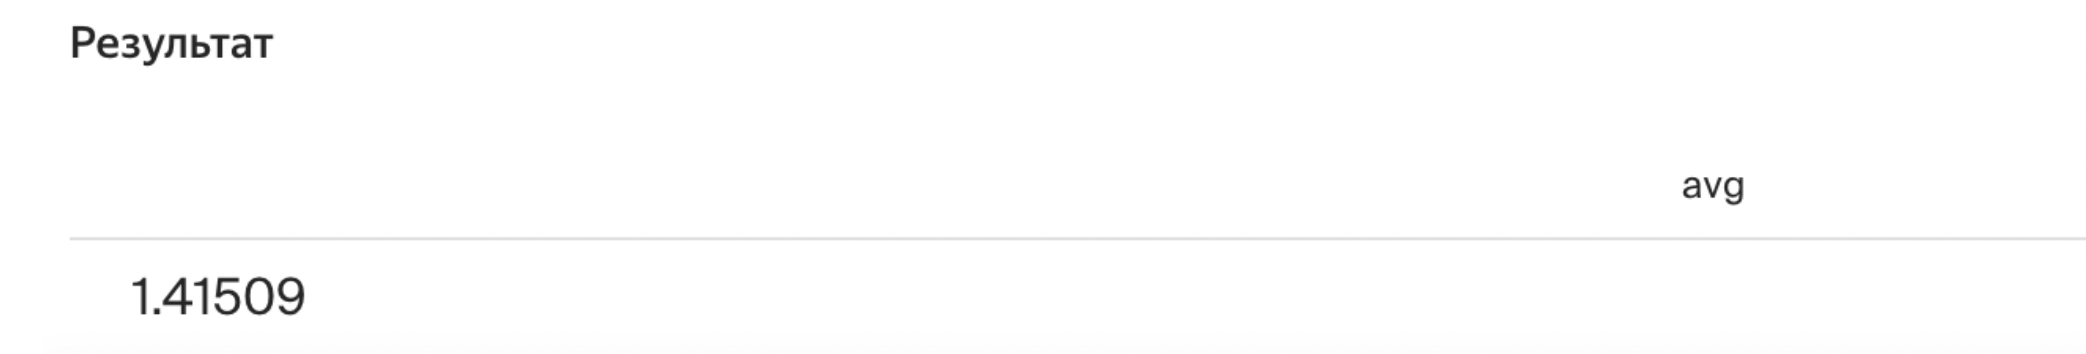

18. Напишем похожий запрос: выведем среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*. *(сервис, запрещённый на территории РФ по состоянию на 2023 г.)*

In [ ]:
WITH base AS 
(SELECT p.id,
COUNT(e.instituition)
FROM people AS p
RIGHT JOIN education AS e ON p.id = e.person_id
WHERE p.company_id IN
(SELECT id
FROM company
WHERE name = 'Facebook')
GROUP BY p.id)
SELECT AVG(COUNT)
FROM base;

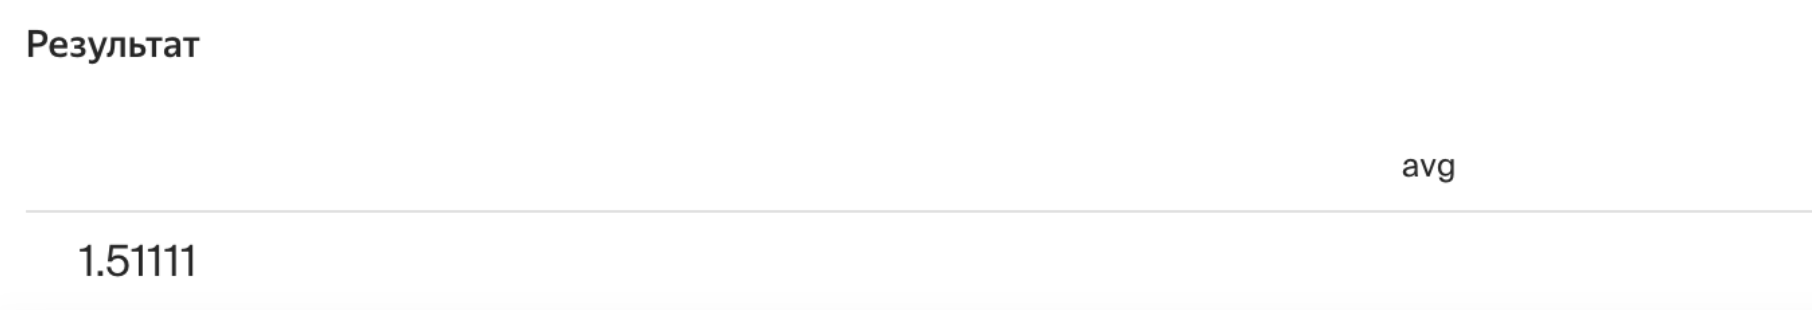

19. Составим таблицу из полей: name_of_fund — название фонда; name_of_company — название компании; amount — сумма инвестиций, которую привлекла компания в раунде. В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund,
c.name AS name_of_company,
fr.raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON c.id = i.company_id
LEFT JOIN fund AS f ON i.fund_id = f.id
INNER JOIN 
(SELECT*
FROM funding_round
WHERE funded_at BETWEEN '2012-01-01' AND '2013-12-31')
AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6;

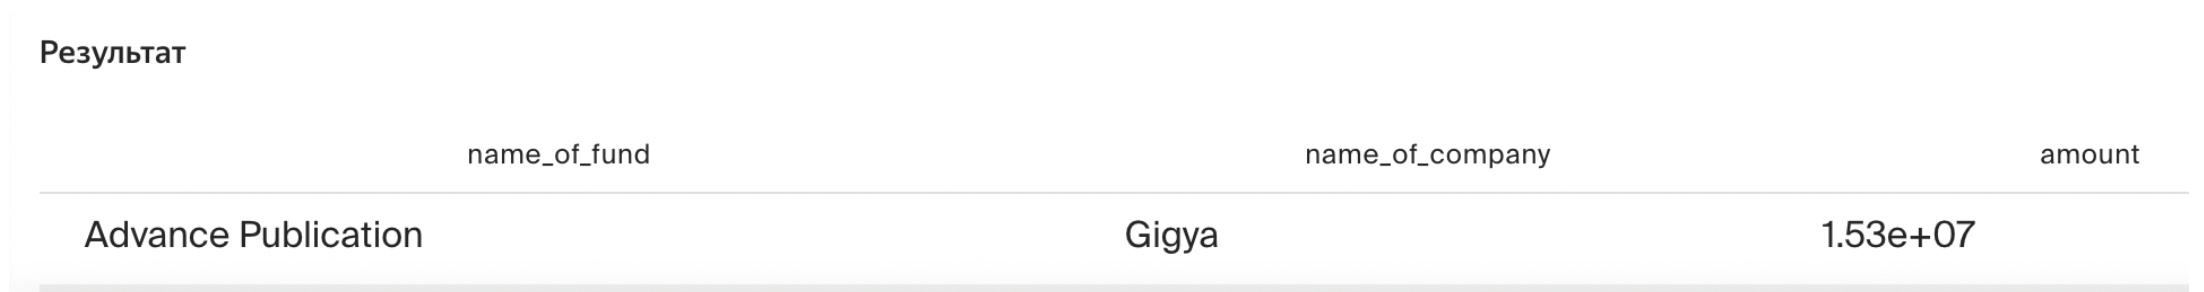

20. Выгрузим таблицу, в которой будут такие поля: название компании-покупателя; сумма сделки; название компании, которую купили; сумма инвестиций, вложенных в купленную компанию; доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа. Не будем учмтывать те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключаем такую компанию из таблицы. Отсортируем таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничим таблицу первыми десятью записями.

In [ ]:
WITH acquiring AS
(SELECT c.name AS buyer,
a.price_amount AS price,
a.id AS KEY
FROM acquisition AS a
LEFT JOIN company AS c ON a.acquiring_company_id = c.id
WHERE a.price_amount > 0),
acquired AS
(SELECT c.name AS acquisition,
c.funding_total AS investment,
a.id AS KEY
FROM acquisition AS a
LEFT JOIN company AS c ON a.acquired_company_id = c.id
WHERE c.funding_total > 0)
SELECT acqn.buyer,
acqn.price,
acqd.acquisition,
acqd.investment,
ROUND(acqn.price / acqd.investment) AS uplift
FROM acquiring AS acqn
JOIN acquired AS acqd ON acqn.KEY = acqd.KEY
ORDER BY price DESC, acquisition
LIMIT 10;

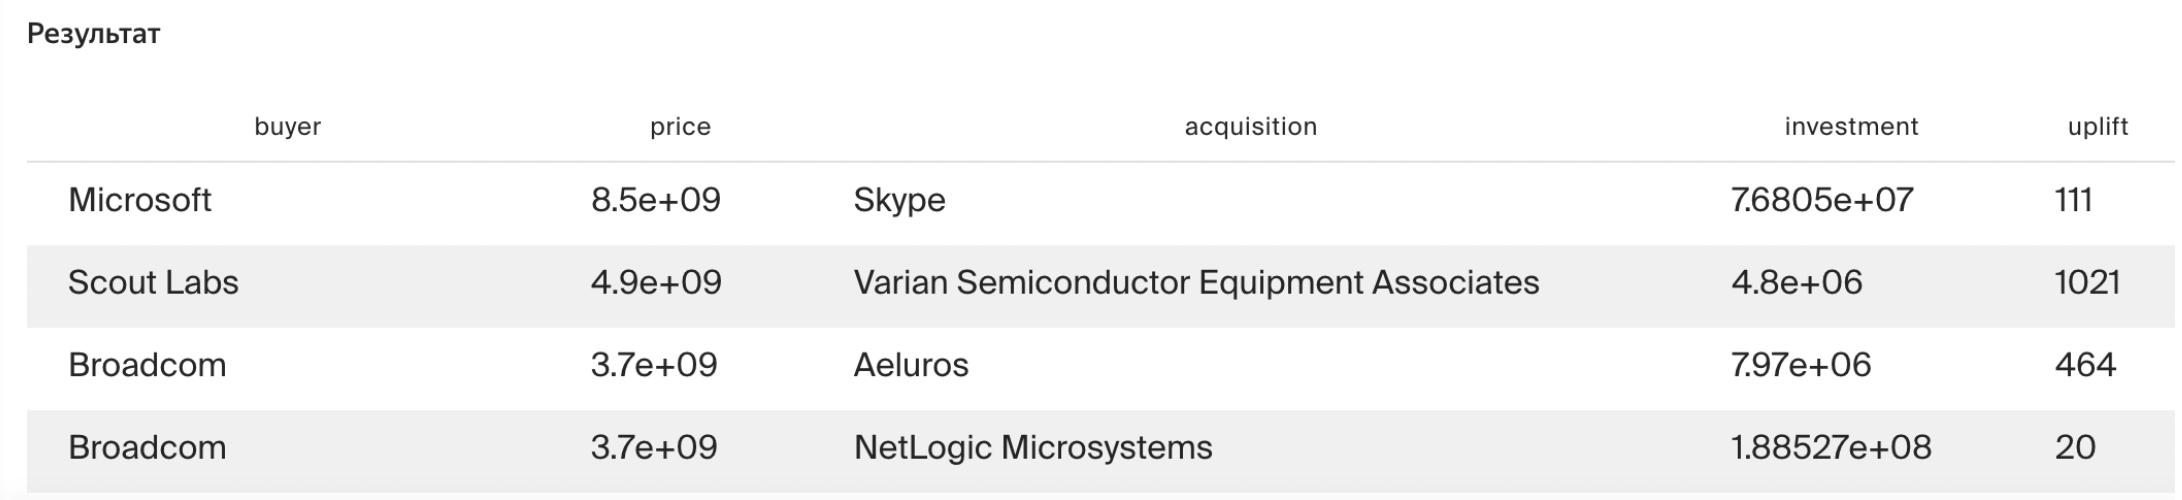

21. Выгрузим таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверим, что сумма инвестиций не равна нулю. Выведем также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT  c.name AS social_co,
EXTRACT (MONTH FROM fr.funded_at) AS funding_month
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE c.category_code = 'social'
AND fr.funded_at BETWEEN '2010-01-01' AND '2013-12-31'
AND fr.raised_amount <> 0;

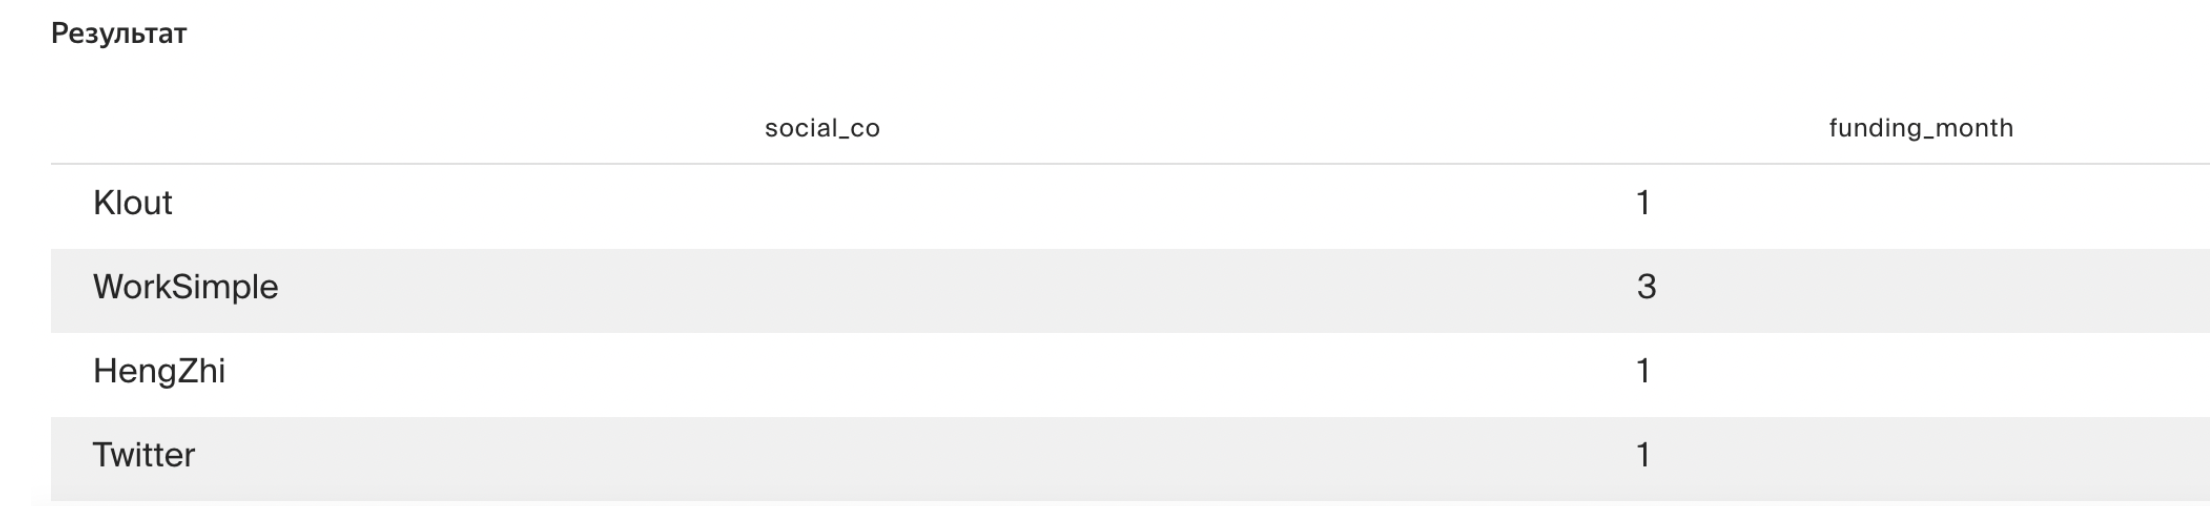

22. Отберем данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируем данные по номеру месяца и получим таблицу, в которой будут поля: номер месяца, в котором проходили раунды; количество уникальных названий фондов из США, которые инвестировали в этом месяце; количество компаний, купленных за этот месяц; общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH fundings AS
(SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS DATE)) AS funding_month,
COUNT(DISTINCT f.id) AS us_funds
FROM fund AS f
LEFT JOIN investment AS i ON f.id = i.fund_id
LEFT JOIN funding_round AS fr ON i.funding_round_id = fr.id
WHERE f.country_code = 'USA'
AND EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
GROUP BY funding_month),
acquisitions AS
(SELECT EXTRACT(MONTH FROM CAST(acquired_at AS DATE)) AS funding_month,
COUNT(acquired_company_id) AS bought_co,
SUM(price_amount) AS sum_total
FROM acquisition
WHERE EXTRACT(YEAR FROM CAST(acquired_at AS DATE)) BETWEEN 2010 AND 2013
GROUP BY funding_month)
SELECT fnd.funding_month, fnd.us_funds, acq.bought_co, acq.sum_total
FROM fundings AS fnd
LEFT JOIN acquisitions AS acq ON fnd.funding_month = acq.funding_month;

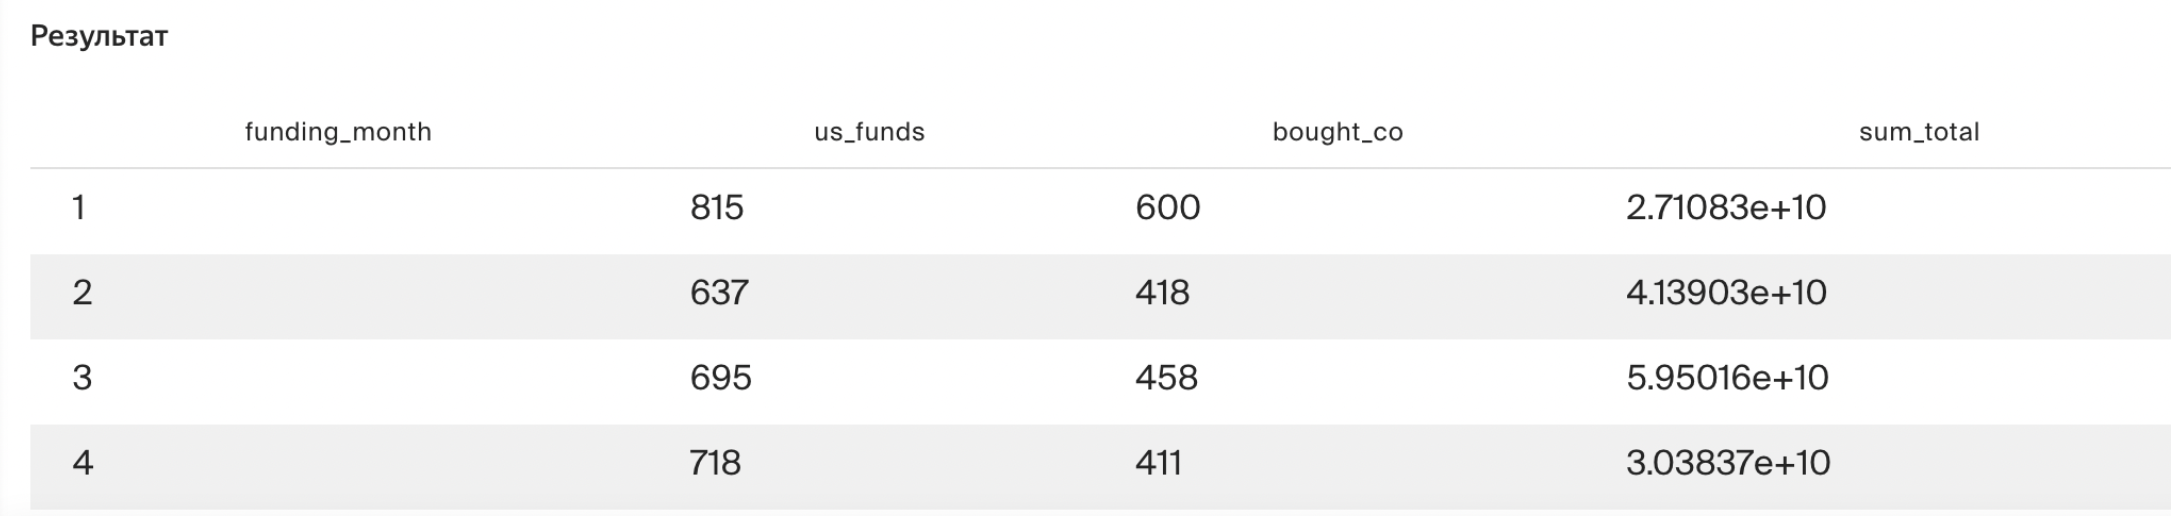

23. Составим сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год в отдельных полях. Отсортируем таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH y_11 AS
(SELECT country_code AS country,
AVG(funding_total) AS y_2011
FROM company
WHERE EXTRACT(YEAR FROM founded_at::DATE) IN(2011, 2012, 2013)
GROUP BY country, EXTRACT(YEAR FROM founded_at)
HAVING EXTRACT(YEAR FROM founded_at) = '2011'),
y_12 AS
(SELECT country_code AS country,
AVG(funding_total) AS y_2012
FROM company
WHERE EXTRACT(YEAR FROM founded_at::DATE) IN(2011, 2012, 2013)
GROUP BY country, EXTRACT(YEAR FROM founded_at)
HAVING EXTRACT(YEAR FROM founded_at) = '2012'),
y_13 AS
(SELECT country_code AS country,
AVG(funding_total) AS y_2013
FROM company
WHERE EXTRACT(YEAR FROM founded_at::DATE) IN(2011, 2012, 2013)
GROUP BY country, EXTRACT(YEAR FROM founded_at)
HAVING EXTRACT(YEAR FROM founded_at) = '2013')
SELECT y_11.country, y_2011, y_2012, y_2013
FROM y_11
JOIN y_12 ON y_11.country = y_12.country
JOIN y_13 ON y_12.country = y_13.country
ORDER BY y_2011 DESC;

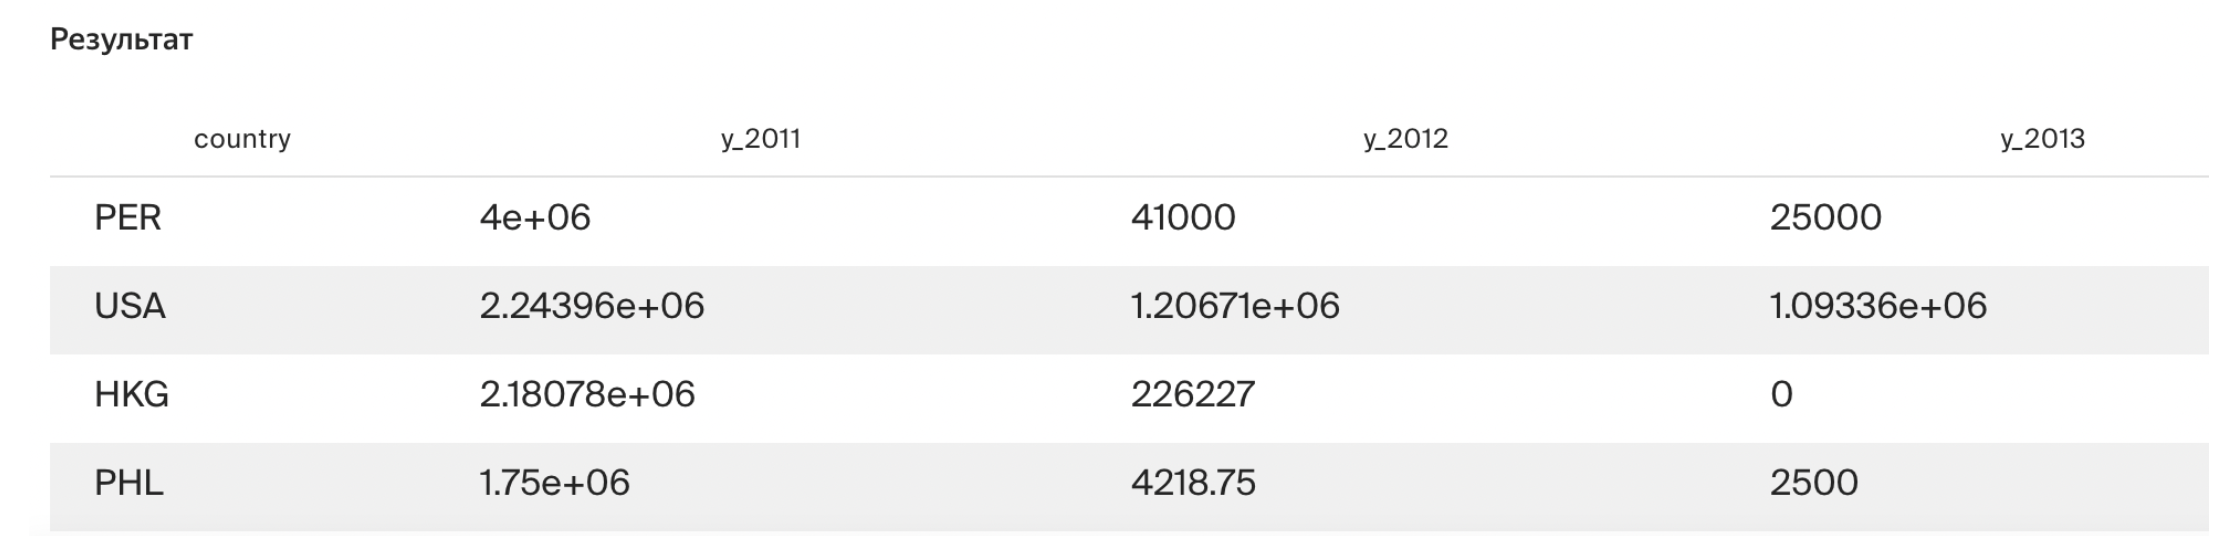

## Итог

В результате выполнения работы отработали следующие навыки:
- писать SQL-запросы разной сложности;
- получать срезы данных и составлять подзапросы;
- применять агрегирующие и оконные функции;
- объединять таблицы разными методами.

Проанализировали данные о стартапах. 
Узнали больше о том, как устроен венчурный рынок, и проанализировали активность фондов. 